<a href="https://colab.research.google.com/github/MachineLearning-Study/Machine_Learning_with_Python_Cookbook/blob/main/%EC%88%98%EC%97%85%EC%9E%90%EB%A3%8C_%EC%BD%94%EB%93%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Chapter 1. 벡터, 행렬, 배열

* 1.1 벡터 만들기

In [ ]:
# 라이브러리를 임포트
import numpy as np

# array 함수 이용, 행 1개인 벡터 생성
vector_row = np.array( [1,2,3] )

# 열 1개인 벡터 생성
vector_column = np.array ( [[1],
                            [2],
                            [3]] )

# 넘파이 배열은 ndarray 클래스의 객체
print (type(vector_row))

<class 'numpy.ndarray'>


In [ ]:
# asarray 함수 이용해 배열 생성
new_row = np.asarray ([1,2,3])

new_row=np.asarray(vector_row)
new_row is vector_row

True

In [ ]:
# array 함수

new_row = np.array(vector_row)
new_row is vector_row

False

* asarray는 copy=false (복사본 없이 저장) / array는 copy=true (복사본 만들어 저장)
* 원본을 변경했을 시, asarray로 만든 참조본은 자동으로 변경, array로 만든 복사본은 변경 안 됨

In [ ]:
# 의도를 분명하게 하고 싶으면 copy 메서드 사용
new_row = vector_row.copy()
new_row is vector_row

False

* 1.2 행렬 만들기

In [ ]:
# 라이브러리를 임포트
import numpy as np

# 행렬을 만듬 (3행2열)
matrix = np.array ([[1,2],
                    [1,2],
                    [1,2]])

In [ ]:
# 행렬에 특화된 데이터 구조 matrix
matrix_object = np.mat([[1,2],
                        [1,2],
                        [1,2]])

# 임의의 값이 채워진 배열 만듬 (3행 2열)
empty_matrix = np.empty ((3,2))

# zeros는 0으로 채운 배열을, ones 는 1로 채운 배열을 만듬
zero_matrix = np.zeros ((3,2))
zero_matrix

one_matrix = np.ones ((3,2))
one_matrix

array([[1., 1.],
       [1., 1.],
       [1., 1.]])

In [ ]:
# zero matrix 만든 후 7 더하기
seven_matrix = np.zeros((3,2))+7

# full 함수 사용
seven_matrix = np.full ((3,2),7)
seven_matrix

array([[7, 7],
       [7, 7],
       [7, 7]])

* 1.3 희소 행렬 만들기

In [ ]:
## 데이터에 0이 너무 많음. 효율적으로 표현하기 위해

# 라이브러리를 임포트
import numpy as np
from scipy import sparse 

# 행렬 생성
matrix = np.array([[0,0],
                   [0,1],
                   [3,0]])

# CSR 행렬 생성 (compressed sparse row 희소 행렬)
matrix_sparse = sparse.csr_matrix(matrix)

# 희소 행렬 출력 - 0이 아닌 값의 인덱스를 나타냄
print (matrix_sparse)

  (1, 1)	1
  (2, 0)	3


In [ ]:
# 큰 행렬 생성
matrix_large = np.array([[0,0,0,0,0,0,0,0,0,0], 
                         [0,1,0,0,0,0,0,0,0,0], 
                         [3,0,0,0,0,0,0,0,0,0]])

# CSR 행렬 생성
matrix_large_sparse = sparse.csr_matrix(matrix_large)

# 원래의 희소 행렬 출력
print(matrix_sparse)

  (1, 1)	1
  (2, 0)	3


In [ ]:
# 큰 희소 행렬 출력
print(matrix_large_sparse)

  (1, 1)	1
  (2, 0)	3


In [ ]:
# 희소 행렬=0이 대다수, 밀집 배열=0이 별로 없음
# (data, (row_index, col_index)) 로 구성된 튜플 전달
# 원소의 행,열 인덱스를 지정해 희소 행렬 만들 수 있음

matrix_sparse_2 = sparse.csr_matrix(([1,3],([1,2],[1,0])), shape=(3,10))
print(matrix_sparse_2)

  (1, 1)	1
  (2, 0)	3


In [ ]:
# CSR 행렬 ->  원래의Numpy array로, toarray 메서드 사용
print(matrix_sparse_2.toarray())

[[0 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0]
 [3 0 0 0 0 0 0 0 0 0]]


In [ ]:
# todense 메서드 (np.matrix 객체를 반환)
matrix_sparse_2.todense()

matrix([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
        [3, 0, 0, 0, 0, 0, 0, 0, 0, 0]], dtype=int64)

* 1.4 원소 선택하기

In [ ]:
# 라이브러리를 임포트

import numpy as np

# 행 벡터 만들기
vector = np.array([1,2,3,4,5,6])

# 행렬 만들기
matrix = np.array([[1,2,3],
                   [4,5,6],
                   [7,8,9]])

# vector의 세 번째 원소를 선택
vector[2]

3

In [ ]:
# matrix의 두 번째 행, 두 번째 열의 원소를 선택
matrix[1,1]

5

In [ ]:
# 벡터에 있는 모든 원소를 선택
vector[:]

array([1, 2, 3, 4, 5, 6])

In [ ]:
# 세 번째 원소를 포함하여 그 이전의 모든 원소를 선택
vector[:3]

array([1, 2, 3])

In [ ]:
# 세 번째 이후의 모든 원소를 선택
vector[3:]

array([4, 5, 6])

In [ ]:
# 마지막 원소를 선택
vector[-1]

6

In [ ]:
# 행렬에서 첫 번째 두 행과 모든 열을 선택
matrix[:2, :]

array([[1, 2, 3],
       [4, 5, 6]])

In [ ]:
# 모든 행과 두 번째 열을 선택
matrix[:,1:2]

array([[2],
       [5],
       [8]])

In [ ]:
# 첫 번째 행과 세 번째 행을 선택
matrix[[0,2]]

array([[1, 2, 3],
       [7, 8, 9]])

In [ ]:
# (0,1), (2,0) 위치의 원소를 선택
matrix[[0,2],[1,0]]

array([2, 7])

In [ ]:
# booolean mask 배열을 만들어 원소를 선택
# matrix의 각 원소에 비교 연산자 적용
mask = matrix > 5

mask

array([[False, False, False],
       [False, False,  True],
       [ True,  True,  True]])

In [ ]:
# 불리언 마스크 배열을 사용하여 원소 선택
matrix[mask]

array([6, 7, 8, 9])

* 1.5 행렬 정보 확인하기

In [ ]:
# 라이브러리 임포트
import numpy as np

# 행렬 생성
matrix = np.array([[1,2,3,4],
                   [5,6,7,8],
                   [9,10,11,12]])

# 행렬 크기 확인
matrix.shape

(3, 4)

In [ ]:
# 행렬의 원소 개수 확인
matrix.size

12

In [ ]:
# 차원 수 확인
matrix.ndim

2

In [ ]:
# 원소의 데이터 타입 확인
print(matrix.dtype)

int64


In [ ]:
# 원소 하나가 차지하는 바이트 크기
print(matrix.itemsize)

8


In [ ]:
# 배열 전체가 차지하는 바이트 크기
print (matrix.nbytes)

96


* 1.6 벡터화 연산 적용하기

In [ ]:
# vectorize 클래스는 배열에 적용하도록 함수 변환시킴

# 라이브러리 임포트
import numpy as np

# 행렬 생성
matrix=np.array([[1,2,3],
                 [4,5,6],
                 [7,8,9]])

# 100을 더하는 함수를 만듬
add_100 = lambda i: i+100

# 벡터화된 함수를 만듬
vectorized_add_100=np.vectorize(add_100)

# 행렬의 모든 원소에 함수를 적용
vectorized_add_100(matrix)

array([[101, 102, 103],
       [104, 105, 106],
       [107, 108, 109]])

In [ ]:
# 모든 원소에 100 더함
matrix + 100


array([[101, 102, 103],
       [104, 105, 106],
       [107, 108, 109]])

In [ ]:
matrix + [50,60,100]

array([[ 51,  62, 103],
       [ 54,  65, 106],
       [ 57,  68, 109]])

In [ ]:
matrix + [[50],[60],[100]]

array([[ 51,  52,  53],
       [ 64,  65,  66],
       [107, 108, 109]])

* 1.7 최댓값, 최솟값 찾기

In [ ]:
# 라이브러리를 임포트
import numpy as np

# 행렬 만듬
matrix = np.array([[1,2,3],
                  [4,5,6],
                  [7,8,9]])

# 가장 큰 원소 반환
np.max(matrix)

9

In [ ]:
# 가장 작은 원소 반환
np.min(matrix)

1

In [ ]:
# 각 열에서 최댓값을 찾습니다
np.max(matrix, axis=0)

array([7, 8, 9])

In [ ]:
# 각 행에서 최댓값을 찾습니다
np.max(matrix,axis=1)

array([3, 6, 9])

In [ ]:
# keepdims 매개변수를 True로 지정 시 원본 배열의 차원과 동일 결과 나옴
# (3,1) 크기의 열 백터 생성
vector_column = np.max(matrix,axis=1,keepdims=True)
vector_column

array([[3],
       [6],
       [9]])

In [ ]:
# 열 벡터이므로 각 행의 최댓값을 뺄 수 있음
matrix-vector_column

array([[-2, -1,  0],
       [-2, -1,  0],
       [-2, -1,  0]])

* 1.8 평균, 분산, 표준편차 계산하기

In [ ]:
# 라이브러리를 임포트
import numpy as np

# 행렬 만듬
matrix = np.array([[1,2,3],
                   [4,5,6],
                   [7,8,9]])

# 평균 반환
np.mean(matrix)

5.0

In [ ]:
# 분산 반환
np.var(matrix)

6.666666666666667

In [ ]:
# 표준편차 반환
np.std(matrix)

2.581988897471611

In [ ]:
# 각 열의 평균 계산
np.mean(matrix, axis=0)

array([4., 5., 6.])

In [ ]:
# 자유도 고려 ddof 매개변수(기본값0)
# ddof 매개변수를 1로 지정하여 편향되지 않은 추정값 얻기
np.std(matrix,ddof=1)

2.7386127875258306

In [ ]:
# pandas 의 std 메서드 ddof 기본값은 1
import pandas as pd

df = pd.DataFrame(matrix.flatten())
df.std()

0    2.738613
dtype: float64

In [ ]:
import numpy as np 
vector_row = np.array([1, 2, 3])

In [ ]:
vector_row = np.array([1, 2, 3])
vector_column = np.array([[1],
                        [2], 
                        [3]])

In [ ]:
print(type(vector_row))

In [ ]:
new_row = np.asarray([1, 2, 3])
new_row = np.asarray(vector_row)

new_row is vector_row 

In [ ]:
new_row = np.array(vector_row)
new_row is vector_row

new_row = vector_row.copy()
new_row is vector_row 

1.2 행렬 만들기 

In [ ]:
matrix = np.array([[1, 2,],
                 [1, 2],
                 [1,2]])

In [ ]:
zero_matrix = np.zeros((3,2))

1.3 희소 행렬 만들기

In [ ]:
from scipy import sparse

In [ ]:
matrix = np.array([[0,0],
                  [0,1],
                   [3,0]])

In [ ]:
matrix_sparse = sparse.csr_matrix(matrix)

1.4 원소 선택하기 

In [ ]:
vector = np.array([1,2, 3, 4, 5, 6])
vector[:]

1.5 행렬 정보 확인하기 

In [ ]:
matrix.shape
matrix.size
matrix.ndim

1.6 벡터화 연산 적용하기

In [ ]:
import numpy as np

In [ ]:
matrix = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])

In [ ]:
add_100 = lambda i:i+100

In [ ]:
vertorized_add_100 = np.vectorize(add_100)

In [ ]:
vertorized_add_100(matrix)
# matrix가 변한 것은 아님

In [ ]:
matrix +100

In [ ]:
matrix +[100, 200 , 300]

In [ ]:
matrix + [[100], [200], [300]]

1.7 최댓값, 최솟값 찾기 

In [ ]:
np.max(matrix)

In [ ]:
np.min(matrix)

In [ ]:
np.max(matrix, axis =0)

In [ ]:
np.max(matrix, axis =1)

In [ ]:
vector_column = np.max(matrix, axis =1, keepdims = True)
vector_column

In [ ]:
vector_row = np.max(matrix, axis=0, keepdims = True)
print9vector_row)
vector_row.shape

In [ ]:
matrix - vector_column

1.8 평균, 분산, 표준편차 계산하기 

In [ ]:
np.mean(matrix)

In [ ]:
np.var(matrix)

In [ ]:
np.std(matrix)

In [ ]:
#각 열마다 평균 구하기
np.mean(matrix, axis=0)

In [ ]:
np.std(matrix, ddof =1)

In [ ]:
# pandas 는 매개변수 기본값이 1입
import pandas as pd
df = pd.DataFrame(matrix.flatten())
df.std()

1.9 배열 크기 바꾸기

In [ ]:
matrix = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9], [10, 11, 12]])

In [ ]:
matrix.reshape(2, 6)

In [ ]:
matrix.size

In [ ]:
# -1은 가능한 많게라는 뜻
matrix.reshape(1, -1)

In [ ]:
matrix.reshape(12)#길이만큼 

In [ ]:
matrix.reshape(-1)#길이상관없이 

In [ ]:
matrix.ravel() #동일 작업 

1.10 벡터나 행렬 전치하기

In [ ]:
matrix = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
matrix

In [ ]:
matrix.T #전치하기

In [ ]:
np.array([1, 2, 3, 4, 5, 6]).T #전치안됨

In [ ]:
np.array([[1, 2, 3, 4, 5, 6]]).T

In [ ]:
matrix.transpose()

In [ ]:
matrix = np.array([[[1, 2],
                    [3, 4],
                    [5, 6]],
                    
                    [[7, 8],
                    [9, 10],
                    [11, 12]]])
matrix.transpose((0, 2, 1))

1.11 행렬 펼치기 

In [ ]:
matrix = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
matrix.flatten() #reshape결과와 비슷 

1.12 행렬의 랭크 구하기 

In [ ]:
np.linalg.matrix_rank(matrix)

1.13 행렬식 계산하기 

In [ ]:
np.linalg.det(matrix)

1.16 고윳값과 고유벡터 찾기

In [ ]:
matrix = np.array([[1, -1, 3],
                  [1, 1, 6],
                  [3, 8, 9]])

In [ ]:
eigenvalues, eigenvectors = np.linalg.eig(matrix)

In [ ]:
eigenvalues #고유값

In [ ]:
eigenvectors #고유벡터

In [ ]:
# 대칭행력의 경우 더 빠르게 계산 
matrix = np.array([[1, -1, 3],
                  [-1, 1, 6],
                  [3, 6, 9]])
eigenvalues, eigenvectors =np.linalg.eigh(matrix)
eigenvalues
eigenvectors

1. 17 점곱 계산하기 

In [ ]:
vector_a = np.array([1, 2, 3])
vector_b = np.array([4, 5, 6])

In [ ]:
np.dot(vector_a, vector_b)

In [ ]:
vector_a @ vector_b#새로운 연산 방법 

1. 18 행렬 덧셈과 뺄셈 

In [ ]:
matrix_a = np.array([[1, 1, 1],
                  [1, 1, 1],
                  [1, 1, 2]])
matrix_b = np.array([[1, 3, 1],
                  [1, 3, 1],
                  [1, 1, 2]])

In [ ]:
np.add(matrix_a, matrix_b)

In [ ]:
np.subtract(matrix_a, matrix_b)

In [ ]:
matrix_a + matrix_b

1.19 행렬 곱셈

In [ ]:
matrix_a = np.array([[1, 1], 
                     [1, 2]])
matrix_b = np.array([[1, 3], 
                     [1, 2]])
np.dot(matrix_a, matrix_b)

1.20 역행렬

In [ ]:
matrix = np.array([[1, 4],
                  [2, 5]])

In [ ]:
np.linalg.inv(matrix)

In [ ]:
#정방행렬 아닌경우 
matrix = np.array([[1, 4, 7],
                  [2, 5, 8]])
np.linalg.pinv(matrix)

1.21 난수 생성하기 

In [ ]:
np.random.seed(0)

In [ ]:
np.random.random(3)

In [ ]:
np.random.randint(0,11, 3)

In [ ]:
np.random.normal(0.0, 1.0, 3)

In [ ]:
#로지스틱 분포 
np.random.logistic(0.0, 1.0, 3)

In [ ]:
np.random.uniform(1.0, 2.0, 3)

In [ ]:
np.random.random_sample((2, 3)) #uniform 에 최소 0, 최대 1과 같다

In [ ]:
np.random.rand(2, 3)

In [ ]:
np.random.choice([0,1, 2], 5)

In [ ]:
a = np.array([0,1, 2, 3, 4])
np.random.shuffle(a)
a

In [ ]:
np.random.permutation(5)
a

In [ ]:
import pandas as pd
import numpy as np
url='https://raw.githubusercontent.com/chrisalbon/simulated_datasets/master/titanic.csv'
dataframe = pd.read_csv(url)

**3.11 행 삭제하기**

In [ ]:
# 열 삭제 방식처럼 drop 함수 사용
dataframe.drop([0,1], axis=0).head(2)

,Name,PClass,Age,Sex,Survived,SexCode
2,"Allison, Mr Hudson Joshua Creighton",1st,30.0,male,0,0
3,"Allison, Mrs Hudson JC (Bessie Waldo Daniels)",1st,25.0,female,0,1


*행 삭제 시에는 불리언 조건을 사용해서 삭제하는 것이 더 실용적이다.*

In [ ]:
# 불리언 조건을 사용하여 행을 삭제
dataframe[dataframe['Sex']!='female'].head(2)

,Name,PClass,Age,Sex,Survived,SexCode
2,"Allison, Mr Hudson Joshua Creighton",1st,30.00,male,0,0
4,"Allison, Master Hudson Trevor",1st,0.92,male,1,0


In [ ]:
dataframe[dataframe['Name']!='Allison, Miss Helen Loraine'].head(2)

,Name,PClass,Age,Sex,Survived,SexCode
0,"Allen, Miss Elisabeth Walton",1st,29.0,female,1,1
2,"Allison, Mr Hudson Joshua Creighton",1st,30.0,male,0,0


In [ ]:
dataframe[dataframe['Survived']==1].head(2)

,Name,PClass,Age,Sex,Survived,SexCode
0,"Allen, Miss Elisabeth Walton",1st,29.00,female,1,1
4,"Allison, Master Hudson Trevor",1st,0.92,male,1,0


*행 인덱스를 사용하여 하나의 행을 삭제할 수도 있다.*

In [ ]:
dataframe[dataframe.index!=0].head(2)

,Name,PClass,Age,Sex,Survived,SexCode
1,"Allison, Miss Helen Loraine",1st,2.0,female,0,1
2,"Allison, Mr Hudson Joshua Creighton",1st,30.0,male,0,0






**3.12 중복된 행 삭제하기**

In [ ]:
# drop_duplicates 매서드 사용 : 행별로 중복데이터 검토, 중복데이터 삭제한 Dataframe 반환
dataframe.drop_duplicates().head(2)

,Name,PClass,Age,Sex,Survived,SexCode
0,"Allen, Miss Elisabeth Walton",1st,29.0,female,1,1
1,"Allison, Miss Helen Loraine",1st,2.0,female,0,1


In [ ]:
# drop_duplicates는 모든 열이 완벽히 동일한 행만 삭제

print("원본 데이터프레임 행의 수:", len(dataframe))
print("중복 삭제 후 행의 수:", len(dataframe.drop_duplicates()))

원본 데이터프레임 행의 수: 1313
중복 삭제 후 행의 수: 1313


In [ ]:
dataframe.drop_duplicates(subset=['Sex'])

,Name,PClass,Age,Sex,Survived,SexCode
0,"Allen, Miss Elisabeth Walton",1st,29.0,female,1,1
2,"Allison, Mr Hudson Joshua Creighton",1st,30.0,male,0,0


In [ ]:
dataframe.drop_duplicates(subset=['Sex'],keep='last')

,Name,PClass,Age,Sex,Survived,SexCode
1307,"Zabour, Miss Tamini",3rd,NaN,female,0,1
1312,"Zimmerman, Leo",3rd,29.0,male,0,0


*중복 행을 삭제하기 전, 행의 중복 여부를 판별할 수 있는 메서드 duplicated*

In [ ]:
# duplicated 메서드를 사용해서 행의 중복 여부를 판별

dataframe.duplicated(subset=['Sex'])

0       False
1        True
2       False
3        True
4        True
        ...  
1308     True
1309     True
1310     True
1311     True
1312     True
Length: 1313, dtype: bool

In [ ]:
dataframe.duplicated(subset=['Sex','Survived'])

0       False
1       False
2       False
3        True
4       False
        ...  
1308     True
1309     True
1310     True
1311     True
1312     True
Length: 1313, dtype: bool

**3.13 값에 따라 행을 그룹핑하기**

*특정 값을 기준으로 개별 행을 그룹핑하는 groupby 사용*

In [ ]:
dataframe.groupby('Sex')

In [ ]:
# groupby는 각 그룹에 적용할 연산을 함께 쓴다.
dataframe.groupby('Sex').mean()

,Age,Survived,SexCode
Sex,,,
female,29.396424,0.666667,1.0
male,31.014338,0.166863,0.0


In [ ]:
dataframe.groupby('Survived').count()

,Name,PClass,Age,Sex,SexCode
Survived,,,,,
0,863,863,443,863,863
1,450,450,313,450,450


In [ ]:
dataframe.groupby('Survived')['Name'].count()

Survived
0    863
1    450
Name: Name, dtype: int64

In [ ]:
dataframe.groupby(['Sex','Survived'])['Age'].mean()

Sex     Survived
female  0           24.901408
        1           30.867143
male    0           32.320780
        1           25.951875
Name: Age, dtype: float64

**3.14 시간에 따라 행을 그룹핑하기**

*resample 메서드를 사용해 시간 간격에 따라 행을 그룹핑한다*




In [ ]:
# 날짜 범위 생성
time_index=pd.date_range('11/01/2020', periods=100000, freq='30s')

# 데이터프레임 생성
dataframe=pd.DataFrame(index=time_index)

# 난숫값으로 열 생성
dataframe['Sale_Amount']=np.random.randint(1,10,100000)

In [ ]:
dataframe.head(3)

,Sale_Amount
2020-11-01 00:00:00,7
2020-11-01 00:00:30,6
2020-11-01 00:01:00,5


In [ ]:
# 주 단위로 행을 그룹핑한 다음 합 계산
dataframe.resample('W').sum()

,Sale_Amount
2020-11-01,14598
2020-11-08,100808
2020-11-15,100182
2020-11-22,101417
2020-11-29,100829
2020-12-06,82555


In [ ]:
# 2주 그룹핑, 평균 계산
dataframe.resample('2W').mean()

,Sale_Amount
2020-11-01,5.068750
2020-11-15,4.984871
2020-11-29,5.016022
2020-12-13,5.009405


In [ ]:
# 1달 그룹핑, 행 카운트
dataframe.resample('M').count()

,Sale_Amount
2020-11-30,86400
2020-12-31,13600


In [ ]:
dataframe.resample('M',label='left').count()

,Sale_Amount
2020-10-31,86400
2020-11-30,13600


In [ ]:
dataframe.resample('MS').count()

,Sale_Amount
2020-11-01,86400
2020-12-01,13600


In [ ]:
# 날짜 범위 생성
time_index=pd.date_range('11/01/2020', periods=10, freq='1d')

# 데이터프레임 생성
dataframe=pd.DataFrame(index=time_index)

# 난숫값으로 열 생성
dataframe['Sale_Amount']=np.random.randint(1,10,10)

In [ ]:
dataframe

,Sale_Amount
2020-11-01,9
2020-11-02,2
2020-11-03,7
2020-11-04,5
2020-11-05,9
2020-11-06,1
2020-11-07,1
2020-11-08,1
2020-11-09,7
2020-11-10,4


In [ ]:
dataframe.resample('W').count()

,Sale_Amount
2020-11-01,1
2020-11-08,7
2020-11-15,2


In [ ]:
dataframe.resample('W',label='left').count()

,Sale_Amount
2020-10-25,1
2020-11-01,7
2020-11-08,2


3.15 열 원소 순회하기

In [ ]:
import pandas as pd
url = 'https://raw.githubusercontent.com/chrisalbon/simulated_datasets/master/titanic.csv'
dataframe = pd.read_csv(url)

In [ ]:
dataframe.head()

In [ ]:
dataframe['Sex'].replace(["female", "male"], ["Woman", "Man"]).head(5)

In [ ]:
dataframe.head()

In [ ]:
#'name'이라는 열의 0~2행 출력
for name in dataframe['Name'][0:2]:
    print(name.upper())

3.16 모든 열 원소에 함수 적용하기 

In [ ]:
def uppercase(x):
    return x.upper()
dataframe['Name'].apply(uppercase)[0:2]

In [ ]:
#먼저 Survived 열 출력해보기 
dataframe['Survived'][0:10]

In [ ]:
dataframe['Survived'].map({1:'Live', 0:'Dead'})[:5]

In [ ]:
dataframe['Age'][0:10]

In [ ]:
(dataframe['Age'].apply(lambda x, age: x <age, age =30)[:5]

In [ ]:
#apply 프레임 전체에 적용가능 각 열마나 가장 큰 값 출력해줌 
dataframe.apply(lambda x: max(x))

 3. 17 그룹에 함수 적용하기

In [ ]:
#성으로 두 개의 그룹 생김 > female, male이 행이 됨
dataframe.groupby('Sex').apply(lambda x: x.count())

 3.18 데이터프레임 연결하기 

In [ ]:
data_a = {'id':['1', '2','3'],
          'first':['Alex', 'Amy', 'Allen'],
          'last': ['Anderson', 'Ackerman', 'Ali']}
dataframe_a = pd.DataFrame(data_a, columns = ['id', 'first', 'last'])

data_b = {'id':['4', '5','6'],
          'first':['Billy', 'Brian', 'Bran'],
          'last': ['Bonder', 'Black', 'Balwner']}
dataframe_b = pd.DataFrame(data_b, columns = ['id', 'first', 'last'])

pd.concat([dataframe_a, dataframe_b], axis=0)

In [ ]:
pd.concat([dataframe_a, dataframe_b], axis=1)

In [ ]:
row = pd.Series([10, 'Chris', 'Chillon'], index =['id', 'first', 'last'])
dataframe_a.append(row, ignore_index = True)

4.6 이상치 감지하기 

In [ ]:
#contamination 매개변수를 지정하는 방법이 완전 과학적x 예술적o 
#이상치가 많을 것으로 예상되면(주관적) contamination 을 크게 정해야함 

In [ ]:
import numpy as np
from sklearn.covariance import EllipticEnvelope #이상치 감지 함수 
from sklearn.datasets import make_blobs

In [ ]:
features, _ = make_blobs(n_samples = 10, n_features = 2, centers = 1, random_state=1)
# 파이선은 인터프리터 언어이기 때문에 언더스코어 많이 사용. 두가지 데이터중 뒤의 것을 뛰어넘고 입력받는 것 

In [ ]:
#ex
a, _, b = 1, 2, 3
print(a)
print(b)
print("------")
a, _, b = 1, 3, 2
print(a)
print(b)

1
3
------
1
2


In [ ]:
features

array([[-1.83198811,  3.52863145],
       [-2.76017908,  5.55121358],
       [-1.61734616,  4.98930508],
       [-0.52579046,  3.3065986 ],
       [ 0.08525186,  3.64528297],
       [-0.79415228,  2.10495117],
       [-1.34052081,  4.15711949],
       [-1.98197711,  4.02243551],
       [-2.18773166,  3.33352125],
       [-0.19745197,  2.34634916]])

In [ ]:
#이상치 만들기 
features[0,0] = 10000
features[0,1] = 10000

In [ ]:
#이상치 감지할 객체 
outlier_detector = EllipticEnvelope(contamination = .1)
#이상치 훈련하기
outlier_detector.fit(features)
#이상치 예측하기
outlier_detector.predict(features)

array([-1,  1,  1,  1,  1,  1,  1,  1,  1,  1])

In [ ]:
feature = features[:, 0] #column 0만 들어감 
print(feature)

[ 1.00000000e+04 -2.76017908e+00 -1.61734616e+00 -5.25790464e-01
  8.52518583e-02 -7.94152277e-01 -1.34052081e+00 -1.98197711e+00
 -2.18773166e+00 -1.97451969e-01]


In [ ]:
#이상치 감지 함수 만들기
def indicies_of_outliers(x):
  q1, q3 = np.percentile(x, [25, 75])  #x안에서 25번째와75번째로 작은 값을 넣기 
  iqr = q3 - q1 #사분범위 
  lower_bound = q1 - (iqr*1.5)
  upper_bound = q3 + (iqr*1.5)
  return np.where((x> upper_bound) | (x<lower_bound))


In [ ]:
indicies_of_outliers(feature)

(array([0]),)

4.7 이상치 다루기

In [ ]:

import pandas as pd 

In [ ]:
houses = pd.DataFrame()
houses['Price'] = [534433, 392333, 293222, 4322032]
houses['Bathrooms'] = [2, 3.5, 2, 116]
houses['Square_Feet'] = [1500, 2500, 1500, 48000]
houses

,Price,Bathrooms,Square_Feet
0,534433,2.0,1500
1,392333,3.5,2500
2,293222,2.0,1500
3,4322032,116.0,48000


In [ ]:
#1 of 3 삭제하기 
houses[houses['Bathrooms'] < 20 ]#4번째 행을 빼기 

,Price,Bathrooms,Square_Feet
0,534433,2.0,1500
1,392333,3.5,2500
2,293222,2.0,1500


In [ ]:
#2 of 3 표시하기
import numpy as np
houses["Outlier"] = np.where(houses["Bathrooms"]<20, 0, 1)
houses 

,Price,Bathrooms,Square_Feet,Outlier
0,534433,2.0,1500,0
1,392333,3.5,2500,0
2,293222,2.0,1500,0
3,4322032,116.0,48000,1


In [ ]:
#3 of 3 영향이 줄어들도록
houses["Log_Of_Square_Feet"] = [np.log(x) for x in houses["Square_Feet"]]
houses

,Price,Bathrooms,Square_Feet,Outlier,Log_Of_Square_Feet
0,534433,2.0,1500,0,7.313220
1,392333,3.5,2500,0,7.824046
2,293222,2.0,1500,0,7.313220
3,4322032,116.0,48000,1,10.778956


4.8 특성 이산화하기 

In [ ]:
import numpy as np
from sklearn.preprocessing import Binarizer

In [ ]:
age = np.array([[6],
                [12],
                [20],
                [36],
                [65]])
binarizer = Binarizer(18) #18이 임계값이 됨

In [ ]:
binarizer.fit_transform(age)

array([[0],
       [0],
       [1],
       [1],
       [1]])

In [ ]:
np.digitize(age, bins=[20, 30, 64])

array([[0],
       [0],
       [1],
       [2],
       [3]])

In [ ]:
#원핫인코딩 - 범주형 데이터 
from sklearn.preprocessing import KBinsDiscretizer
kb = KBinsDiscretizer(4, encode ='onehot-dense', strategy ='quantile')
kb.fit_transform(age)

array([[1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.]])

4.9 군집으로 샘플을 그룹으로 묶기 

In [ ]:
import pandas as pd
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans 

In [ ]:
features, _ = make_blobs(n_samples = 50,
                         n_features = 2,
                         centers = 3,
                         random_state = 1)
dataframe = pd.DataFrame(features, columns = ["feature_1", "feature_2"])
clusterer = KMeans(3, random_state=0)
clusterer.fit(features)
dataframe["group"] = clusterer.predict(features)
dataframe.head(10)

,feature_1,feature_2,group
0,-9.877554,-3.336145,2
1,-7.287210,-8.353986,0
2,-6.943061,-7.023744,0
3,-7.440167,-8.791959,0
4,-6.641388,-8.075888,0
5,-0.794152,2.104951,1
6,-2.760179,5.551214,1
7,-9.946905,-4.590344,2
8,-0.525790,3.306599,1
9,-1.981977,4.022436,1


4.10 누락된 값을 가진 샘플을 삭제하기 

In [ ]:
features = np.array([[1.1, 11.1],
                     [2.2, 22.2],
                     [3.3, 33.3],
                     [4.4, 44.4],
                     [np.nan, 55]])

In [ ]:
#~ 연산 사용하여 누락된값 없애기_numpy 이용
features[~np.isnan(features).any(axis=1)]

array([[ 1.1, 11.1],
       [ 2.2, 22.2],
       [ 3.3, 33.3],
       [ 4.4, 44.4]])

In [ ]:
#~ 연산 사용하여 누락된값 없애기_pandas 이용
import pandas as pd
dataframe = pd.DataFrame(features, columns =["feature_1", "feature_2"])
dataframe.dropna()

,feature_1,feature_2
0,1.1,11.1
1,2.2,22.2
2,3.3,33.3
3,4.4,44.4


4.11 누락된 값 채우기 

In [ ]:
import numpy as np
from fancyimpute import KNN
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_blobs

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


In [ ]:
feaures, _ =make_blobs(n_samples = 1000, n_features = 2, random_state =1) #행렬 만들기
scaler = StandardScaler()
standardized_features = scaler.fit_transform(features)#평균이 0, 분산이 1이 되도록 표준화
standardized_features

array([[-1.34164079, -1.42058311],
       [-0.4472136 , -0.70707756],
       [ 0.4472136 ,  0.00642798],
       [ 1.34164079,  0.71993352],
       [        nan,  1.40129917]])

In [ ]:
#값 하나 삭제
true_value = standardized_features[0,0]
standardized_features[0,0] = np.nan

In [ ]:
#예측 하기 
features_knn_imputed = KNN(k=5, verbose=0).fit_transform(standardized_features)
print("실제값", true_value)
print("대체된 값", features_knn_imputed[0,0])

실제값 -1.3416407864998736
대체된 값 -1.3416407864998736


# Chapter 3. 데이터 랭글링

## 3.1 데이터 프레임 만들기

In [ ]:
### 데이터 랭글링(Data Wrangling) 
#### 원본 데이터를 정제하고 사용 가능한 형태로 구성하기 위한 변환 과정. 잔처리의 한단계이지만 중요한 단계

In [ ]:
import pandas as pd

#### 새로운 데이터 프레임 만들기

# 빈 데이터 프레인 만들기
dataframe = pd.DataFrame()

# 빈 데이터에 값 넣어주기
dataframe['Name'] = ['Jacky Jackson', 'Steve Steveson']
dataframe['Age']=[38,25]
dataframe['Driver']=[True,False]

dataframe

,Name,Age,Driver
0,Jacky Jackson,38,True
1,Steve Steveson,25,False


In [ ]:
# 데이터 프레임 안에 넣을 새로운 열 만들기
new_person = pd.Series(['Molly Mooney', 40, True],
             index = ['Name','Age','Driver'])

# 열 추가하기
dataframe.append(new_person,ignore_index=True)

,Name,Age,Driver
0,Jacky Jackson,38,True
1,Steve Steveson,25,False
2,Molly Mooney,40,True


In [ ]:
### 데이터프레임 객체를 만들때 데이터를 전달하는 방법

import numpy as np

In [ ]:
#### 넘파이 배열을 주입하기

data = [['Jacky Jackson']]

matrix = np.array(data)

# 열 이름은 columns 에 넣어준다
pd.DataFrame(matrix, columns = ['Name'])

,Name
0,Jacky Jackson


In [ ]:
#### 원본 리스트 전달하기

pd.DataFrame(data,columns=['Name'])

,Name
0,Jacky Jackson


In [ ]:
#### 열 이름과 데이터를 매핑한 딕셔너리 사용

data = {'Name': ['Jacky Jackson','Steve Stevenson'],
        'Age': [38, 25]}

pd.DataFrame(data)

,Name,Age
0,Jacky Jackson,38
1,Steve Stevenson,25


In [ ]:
#### 샘플마다 열과 값을 매핑한 딕셔너리를 리스트로 전달

data=[ {'Name': 'Jacky Jackson', 'Age':38 },
       {'Name': 'Steve Steveson', 'Age': 25}]

# index 매개변수에 인덱스 따로 지정 가능
pd.DataFrame(data, index = ['row1', 'row2'])

,Name,Age
row1,Jacky Jackson,38
row2,Steve Steveson,25


## 3.2 데이터 설명하기

 데이터 프레임 특징

1)	데이터 . head(숫자) --- 위에서부터 보고싶은 행의 개수 지정
default 값은 5.  tail(숫자) 밑에서부터 보고싶은 행 지정 

2)	데이터 . shape  ---- 열과 행의 수 확인  ( row 행 , column 열)

3)	데이터 . describe()   ---- 숫자로 된 열의 통계 값 확인

## 3.3 데이터프레임 탐색하기

데이터 프레임의 개별 데이터나 일부 선택하기

1)	loc 나 iloc 메소드 이용하기
	ex) 데이터 . iloc[0] ---- 첫번째 행 선택
    
2)	: (콜론) 으로 슬라이싱이 가능
	ex) 데이터 . iloc[1:4] ---- 두번째, 세번째, 네번째 행을 선택
    
3)	한 지점까지 모든 행 선택 가능
    ex) 데이터 . iloc[:4] ---- 다섯번쨰 행을 제외한 그전의 모든 행 선택
    
4)	행이 고유해지면 어떠한 값도 인덱스로 설정 가능
    ex) 데이터 = 데이터 . set_index(컬럼명)
   

데이터 프레임의 인덱스

1)	영문자와 숫자로 이루어진 고유한 문자열이거나 임의의 숫자

2)	loc ---- 인덱스, 컬럼명 아무거나 사용가능

3)	iloc ---- 인덱스 번호로만 사용가능(정수) 
      
4)	데이터 . loc [1:6] 을 하면 두번째부터 일곱번째까지 다 보여준다

5)	데이터 . iloc [1:6] 을 하면 두번째부터 여섯번째까지만 보여준다

6)	row를 뽑고나서 거기서 또 몇번째 column 까지만 보고싶을때는
데이터 . iloc['row':'row', 'column':'column'] 이렇게 적으면 어디서부터 어디까지의 row 중에서 어디서부터 어디까지의 column까지만 보여주게된다

7)	슬라이싱은 행을 선택, 인덱싱은 열을 선택


## 3.4 조건에 따라 행 선택하기

조건에 따라 데이터 프레임 행 선택 

1)	데이터 [ 데이터[‘컬럼명’] == ‘조건’ ]  --- 특정 컬럼이 조건을 만족하는 값들만 보여줌

2)	데이터 [ (데이터[‘컬럼명’] == ‘조건’) & (데이터[‘컬럼명’] >= 조건’) ] --- 두개의 조건을 다 만족하는 값들만 보여줌

3)	원본 데이터를 그대로 사용하기보단 조건을 통해서 필요한 값을 불러오는 것이 중요


## 3.5 값 치환히기

값 치환하기

1) 데이터['컬럼명'] . replace('원래값' , '바꿀값')

2) 데이터['컬럼명'] . replace( ['원래값1' , '원래값2'] , ['바꿀값1' , '바꿀값2'] )

3) 데이터 . replace( '원래값' , '바꿀값')   ---  전체 데이터에서 원래값을 찾아서 그걸 바꿀값으로 바꿔줌

4) 데이터 . replace( ['원래값1' , '원래값2'] , 바꿀값)

5) 데이터 . replace( {'원래값1' : '바꿀값1', '원래값2' : '바꿀값2'} ) 

## 3.6 열 이름 바꾸기

열 이름 바꾸기

1) 데이터 . rename ( columns = {원래이름 : 바꿀이름} )

2) 데이터 . rename ( columns = {원래이름1 : 바꿀이름1 , 원래이름2 : 바꿀이름2} )

3) 데이터 . columns 하게되면 모든 columns 이름이 나온다.
      
   그걸 복사한 후에 데이터 . columns = [ 'column이름' , 'column이름' , '바꿀이름' ] 이렇게 적어주면 기존이름에서 바꿀이름으로 바뀐다
   
   대신 이건 따로 저장하지 않아도 바로 저장되는거 주의

4) 데이터 . rename ( index = { 원래인덱스 : 바꿀인덱스 } ) 

5) 데이터 . rename (str.lower, axis = 'columns'혹은'index')

## 3.7 최솟값, 최댓값, 합, 평균 계산 및 개수 세기

최솟값, 최댓값, 합, 평균 계산 및 개수 세기

1) 최솟값 = 데이터['컬럼명'] . min()

2) 최댓값 = 데이터['컬럼명'] . max()

3) 합 = 데이터['컬럼명'] . sum()

4) 평균 = 데이터['컬럼명'] . mean()

5) 카운트 = 데이터['컬럼명'] . count()

6) 이외에도 분산(var), 표준편차(std), 첨도(kurt), 비대칭도(skew), 평균의표준오차(sem), 최빈값(mode), 중간값(median) 많은 메서드 존재

7) 데이터 자체에 적용할 수 도 있다 ex) count() 

8) describe() 를 이용하여 한번에 확인 가능

## 3.8 고유한 값 찾기

고유한 값 찾기

1) 데이터 [컬럼명] . unique() ---- 고유값들을 모두 나열해서 보여줌

2) 데이터 [컬럼명] . value_counts() ---- 고유값들을 보여주고 등장 횟수를 보여줌

3) 데이터 [컬럼명] . nunique()  ----- 고유값 종류 갯수만 보여줌

4) nunique()를 했을 때 null 값들은 세지 않는다

## 3.9 누락된 값 다루기

누락된 값 다루기

1) 데이터 [컬럼명] . isnull() 혹은 isna() 

2) 만약 존재하던 값을 null 값으로 바꿔주고싶다면  데이터[컬럼명] = 데이터[컬럼명] . replace(기존값 , np.nan) 

3) pd.read_csv로 데이터를 불러올때 na_values = [NaN 으로 표시할 것] 하면 안에 문자가 null 값으로 인식됨

4) 똑같이 keep_default_na = 에서 False 로하면 null 값들이 NaN 으로 표시되지 않고 비어진다

5) na_filter = 를 False로해도 NaN 변환을 하지 않는다

## 3.10 열 삭제하기

열 삭제하기

1) 데이터 . drop ('컬럼명', axis = 1)

2) 데이터 . drop ([컬렴명1', '컬럼명2'], axis=1 ) 

3) 열의 이름이 없으면    데이터 . drop( 데이터.column[1], axis=1) 이렇게 지울수 있다

4) del 데이터[컬럼명] 으로 지울 수도 있고 inplace = True 를 통해 지운 값을 쭉 저장할수도있지만 권장하지 않는다

#5.1 순서가 없는 범주형 특성 인코딩하기

*사이킷런의 LabelBinarizer 사용*

In [ ]:

#라이브러리 임포트
import numpy as np
from sklearn.preprocessing import LabelBinarizer, MultiLabelBinarizer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

In [ ]:
#특성 만듬
feature = np.array([["Texas"],
                    ["California"],
                    ["Texas"],
                    ["Delaware"],
                    ["Texas"]])

# 원-핫 인코더 만듬
one_hot = LabelBinarizer()

# 특성을 원-핫 인코딩
one_hot.fit_transform(feature)

array([[0, 0, 1],
       [1, 0, 0],
       [0, 0, 1],
       [0, 1, 0],
       [0, 0, 1]])

In [ ]:
one_hot.fit(feature)

LabelBinarizer(neg_label=0, pos_label=1, sparse_output=False)

In [ ]:
one_hot.transform(feature)

array([[0, 0, 1],
       [1, 0, 0],
       [0, 0, 1],
       [0, 1, 0],
       [0, 0, 1]])

In [ ]:
# 특성의 클래스를 확인
one_hot.classes_

array(['California', 'Delaware', 'Texas'], dtype='<U10')

In [ ]:
# 원-핫 인코딩 되돌리기
one_hot.inverse_transform(one_hot.transform(feature))

array(['Texas', 'California', 'Texas', 'Delaware', 'Texas'], dtype='<U10')

*다중 클래스를 인코딩하기*

In [ ]:
# 다중 클래스 특성 만듬
multiclass_feature = [("Texas", "Florida"),
                      ("California", "Alabama"),
                      ("Texas", "Florida"),
                      ("Delware","Florida"),
                      ("Texas","Albama")]

# 다중 클래스 원-핫 인코더 만듬
one_hot_multiclass=MultiLabelBinarizer()

# 다중 클래스 특성을 원-핫 인코딩
one_hot_multiclass.fit_transform(multiclass_feature)

array([[0, 0, 0, 0, 1, 1],
       [1, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 1, 1],
       [0, 0, 0, 1, 1, 0],
       [0, 1, 0, 0, 0, 1]])

In [ ]:
# 클래스 확인
one_hot_multiclass.classes_

array(['Alabama', 'Albama', 'California', 'Delware', 'Florida', 'Texas'],
      dtype=object)

*OneHotEncoder 클래스 사용 - 희소 배열 반환*

In [ ]:
# 여러 개의 열이 잇는 특성 배열 만듬
feature=np.array([["Texas",1],
                  ["California",1],
                  ["Texas",3],
                  ["Delaware",1],
                  ["Texas",1]])

one_hot_encoder=OneHotEncoder(sparse=False)
one_hot_encoder.fit_transform(feature)

array([[0., 0., 1., 1., 0.],
       [1., 0., 0., 1., 0.],
       [0., 0., 1., 0., 1.],
       [0., 1., 0., 1., 0.],
       [0., 0., 1., 1., 0.]])

In [ ]:
# 클래스 확인
one_hot_encoder.categories_

[array(['California', 'Delaware', 'Texas'], dtype='<U10'),
 array(['1', '3'], dtype='<U10')]

*판다스를 사용해서 원-핫 인코딩*

In [ ]:
# 라이브러리 임포트

import pandas as pd

In [ ]:
# 특성으로 더미(dummy) 변수 생성
pd.get_dummies(feature[:,0])

,California,Delaware,Texas
0,0,0,1
1,1,0,0
2,0,0,1
3,0,1,0
4,0,0,1


#5.2 순서가 있는 범주형 특성 인코딩하기

In [ ]:
replace 메서드를 사용하여 문자열 레이블을 수치값으로 반환

In [ ]:
#특성 만들기
dataframe=pd.DataFrame({"Score":["Low","Low","Medium","Medium","High"]})

#매핑 딕셔너리 만들기
scale_mapper={"Low":1,
              "Medium":2,
              "High":3}

#특성을 정수로 변환
dataframe["Score"].replace(scale_mapper)

0    1
1    1
2    2
3    2
4    3
Name: Score, dtype: int64

In [ ]:
# 클래스에 매핑하는 수치값에 주의를 기울여야 한다.

dataframe=pd.DataFrame({"Score":["Low","Low","Medium","Medium","High","Barely More Than Medium"]})
scale_mapper={"Low":1,
              "Medium":2,
              "Barely More Than Medium":2.1,
              "High":3}
dataframe["Score"].replace(scale_mapper)

0    1.0
1    1.0
2    2.0
3    2.0
4    3.0
5    2.1
Name: Score, dtype: float64

*OrdinalEncoder을 사용해 클래스 범주를 순서대로 변환*

In [ ]:
from sklearn.preprocessing import OrdinalEncoder

features=np.array([["Low",10],
                   ["High",50],
                   ["Medium",3]])

ordinal_encoder=OrdinalEncoder()
ordinal_encoder.fit_transform(features)


array([[1., 0.],
       [0., 2.],
       [2., 1.]])

In [ ]:
ordinal_encoder.categories_

#5.3 특성 딕셔너리를 인코딩하기

*DictVectorizer 을 사용*

In [ ]:
# 라이브러리를 임포트

from sklearn.feature_extraction import DictVectorizer

# 딕셔너리를 만듭니다.
data_dict = [{"Red":2, "Blue":4},
             {"Red":4, "Blue":3},
             {"Red":1, "Yellow":2},
             {"Red":2, "Yellow":2}]

# Dicvectorizer 객체를 만듭니다
dicvectorizer = DictVectorizer(sparse=False)

# 딕셔너리를 특성 행렬로 변환합니다
features = dicvectorizer.fit_transform(data_dict)

features

array([[4., 2., 0.],
       [3., 4., 0.],
       [0., 1., 2.],
       [0., 2., 2.]])

In [ ]:
# 특성 이름을 얻기
features_names=dicvectorizer.get_feature_names()

# 특성 이름 확인
features_names

['Blue', 'Red', 'Yellow']

In [ ]:
# 판다스 DaTaFrame으로 출력한다

import pandas as pd

pd.DataFrame(features, columns=features_names)

,Blue,Red,Yellow
0,4.0,2.0,0.0
1,3.0,4.0,0.0
2,0.0,1.0,2.0
3,0.0,2.0,2.0


#5.4 누락된 클래스 값 대체하기

머신러닝 분류 알고리즘을 훈련하여 누락된 값 예측

KNN 분류기를 사용


In [ ]:
# 라이브러리를 임포트
import numpy as np
from sklearn.neighbors import KNeighborsClassifier

# 범주형 특성을 가진 특성 행렬을 만듬
X = np.array([[0, 2.10, 1.45],
              [1, 1.18, 1.33],
              [0, 1.22, 1.27],
              [1,-0.21,-1.19]])

# 범주형 특성에 누락된 값이 있는 특성 행렬을 만듬
X_with_nan = np. array([[np.nan, 0.87, 1.31],
                        [np.nan, -0.67, -0.22]])


In [ ]:
# KNN 학습기를 훈련
clf=KNeighborsClassifier(3,weights='distance')
trained_model = clf.fit(X[:,1:], X[:,0])

# 누락된 값의 클래스를 예측
imputed_values = trained_model.predict(X_with_nan[:,1:])

# 예측된 클래스와 원본 특성을 열로 합침
X_with_imputed = np.hstack((imputed_values.reshape(-1,1), X_with_nan[:,1:]))

# 두 특성 행렬을 연결
np.vstack((X_with_imputed, X))

array([[ 0.  ,  0.87,  1.31],
       [ 1.  , -0.67, -0.22],
       [ 0.  ,  2.1 ,  1.45],
       [ 1.  ,  1.18,  1.33],
       [ 0.  ,  1.22,  1.27],
       [ 1.  , -0.21, -1.19]])

누락된 값을 특성에서 가장 자주 등장하는 값으로 채우기

In [ ]:
from sklearn.impute import SimpleImputer

# 두 개의 특성 행렬을 합침
X_complete = np.vstack((X_with_nan, X))

imputer = SimpleImputer(strategy='most_frequent')
imputer.fit_transform(X_complete)

array([[ 0.  ,  0.87,  1.31],
       [ 0.  , -0.67, -0.22],
       [ 0.  ,  2.1 ,  1.45],
       [ 1.  ,  1.18,  1.33],
       [ 0.  ,  1.22,  1.27],
       [ 1.  , -0.21, -1.19]])

#5.5. 불균형한 클래스 다루기

In [ ]:
# 라이브러리를 임포트

import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris

# 붓꽃 데이터 적재
iris = load_iris()

# 특성 행렬 만들기
features = iris.data

# 타깃 벡터 만들기
target = iris.target

# 처음 40개 샘플 삭제
features = features[40:,:]
target = target[40:]

# 클래스 0을 음성 클래스로 하는 이진 타깃 벡터를 만듭니다
target = np.where ((target==0),0,1)

target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

*클래스 가중치 매개변수를 사용해 알고리즘이 불균형한 클래스 조정*

In [ ]:
# 가중치 만듬
weights = {0: .9, 1:0.1}

# 가중치를 부여한 랜덤 포레스트 분류기 만듬
RandomForestClassifier(class_weight=weights)


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                       class_weight={0: 0.9, 1: 0.1}, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=100, n_jobs=None, oob_score=False,
                       random_state=None, verbose=0, warm_start=False)

In [ ]:
# 균형잡힌 클래스 가중치로 랜덤 포레스트 모델 훈련
RandomForestClassifier(class_weight="balanced")

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

* 업샘플링 : 소수 클래스의 샘플을 늘린다
* 다운샘플링 : 다수 클래스의 샘플을 줄인다

다운샘플링

In [ ]:
# 각 클래스의 샘플 인덱스 추출
i_class0=np.where(target==0)[0]
i_class1=np.where(target==1)[0]

# 각 클래스의 샘플 개수
n_class0 = len(i_class0)
n_class1 = len(i_class1)

# 클래스 0의 샘플만큼 클래스 1에서 중복을 허용하지 않고 랜덤하게 샘플 뽑기
i_class1_downsampled = np.random.choice(i_class1, size=n_class0, replace=False)

# 클래스 0의 타깃 벡터와 다운샘플링된 클래스 1의 타깃 벡터를 합침
np.hstack((target[i_class0], target[i_class1_downsampled]))

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [ ]:
# 클래스 0의 특성 행렬과 다운샘플링된 클래스 1의 특성 행렬을 합칩니다.
np.vstack((features[i_class0,:], features[i_class1_downsampled, :]))[0:5]


array([[5. , 3.5, 1.3, 0.3],
       [4.5, 2.3, 1.3, 0.3],
       [4.4, 3.2, 1.3, 0.2],
       [5. , 3.5, 1.6, 0.6],
       [5.1, 3.8, 1.9, 0.4]])

업샘플링

In [ ]:
# 클래스 1의 샘플 개수만큼 클래스 0에서 중복을 허용하여 랜덤하게 샘플 선택
i_class0_upsampled = np.random.choice(i_class0, size=n_class1, replace=True)

# 클래스 0의 업샘플링된 타깃 벡터와 클래스 1의 타깃 벡터를 합침
np.concatenate((target[i_class0_upsampled], target[i_class1]))

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

In [ ]:
# 클래스 0의 업샘플링된 특성 행렬과 클래스 1의 특성 행렬을 합침
np.vstack((features[i_class0_upsampled,:], features[i_class1,:]))[0:5]

array([[5.1, 3.8, 1.6, 0.2],
       [5. , 3.5, 1.3, 0.3],
       [5.3, 3.7, 1.5, 0.2],
       [4.6, 3.2, 1.4, 0.2],
       [4.4, 3.2, 1.3, 0.2]])

#Chapter 7. 날짜와 시간 다루기

## 7.1 문자열을 날짜로 변환하기

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
# 날짜와 시간을 나타내는 문자열 벡터를 시계열 데이터로 변환하기

date_strings = np.array(['04-03-05 1:35 PM',
                 '23-05-10 12:01 AM',
                 '04-09-09 09:09 PM'])

In [ ]:
#### pd.to_datetime (날짜 , format =         )  for 날짜 in 데이터

[pd.to_datetime(date, format='%d-%m-%y %I:%M %p') for date in date_strings]

[Timestamp('2005-03-04 13:35:00'),
 Timestamp('2010-05-23 00:01:00'),
 Timestamp('2009-09-04 21:09:00')]

In [ ]:
#### pd.to_datetime(데이터 , format=   )

pd.to_datetime(date_strings, format='%d-%m-%y %I:%M %p')

# pandas 자체에서 월-일-년 순으로 인식하고있음. format 형식을 써서 맞춰주기
pd.to_datetime(date_strings)

DatetimeIndex(['2005-04-03 13:35:00', '2010-05-23 00:01:00',
               '2009-04-09 21:09:00'],
              dtype='datetime64[ns]', freq=None)

error

---- raise, coerce, ignore

---- default 값은 raise

In [ ]:
date_error= np.array(['0-03-2005 1:35 PM',
                 '23-05-2010 12:01 AM',
                 '04-09-2009 09:09 PM'])

In [ ]:
pd.to_datetime(date_error, format='%d-%m-%Y %I:%M %p', errors='raise')

ValueError: ignored

In [ ]:
pd.to_datetime(date_error, format='%d-%m-%Y %I:%M %p', errors='coerce')

In [ ]:
pd.to_datetime(date_error, format='%d-%m-%Y %I:%M %p', errors='ignore')

많이 사용하는 날짜와 시간 format code


1.  %Y ----전체연도----2001
2.  %m ---- 0으로 시작하는 월----04
3.  %d ----0으로 시작하는 일---- 09
4.  %I ---- 0으로시작하는시간(12시간제)----02
5.  %p---- AM 또는 PM ----AM
6.  %M----0으로 시작하는 분----05
7. %S ---- 0으로 시작하는 초 ---- 09 

구글에 python strftime reference 검색해서 사용하면된다



## 7.2 시간대 다루기

In [ ]:
# 시계열 데이터에서 시간대 정보를 추가하거나 바꾸기

import pandas as pd

In [ ]:
### 지정하지않으면 판다스에는 시간대가 없음. tz 매개변수를 이용하여 시간대 추가하기

pd.Timestamp('2017-05-01 06:00:00', tz='Europe/London')

In [ ]:
### tz_localize를 이용하여 이전 datetime에 시간대를 추가하기

date = pd.Timestamp('2017-05-01 06:00:00')

date_in_london = date.tz_localize('Europe/London')

date_in_london

In [ ]:
### tz_convert를 이용하여 다른 시간대로 변환하기

date_in_london.tz_convert('Africa/Abidjan')

pd.date_range(

  start = 시작날짜

  end = 끝나는날짜

  period = 만들 날짜의 갯수

  freq = 어떤걸 주기로 만들건지 ('D'하루, 'M'한달, '3M'3달 등등)

  closed = left 면 end 날짜 미포함

  closed = right 이면 start 날짜 미포함

  tz = 시간대 )

In [ ]:
### tz_localize나 tz_convert 는 Series 의 모든 원소에 적용됨

dates = pd.Series(pd.date_range('2/2/2020',periods=3, freq='M'))

dates.dt.tz_localize('Africa/Abidjan')

In [ ]:
### 전체 시간대 문자열 보기

from pytz import all_timezones 

all_timezones[:]

## 7.3 날짜와 시간 선택하기

In [ ]:
# 날짜 벡터에서 하나 이상의 원소 선택하기 

dataframe=pd.DataFrame()

dataframe['date']=pd.date_range('1/1/2001',periods=100000,freq='H')

In [ ]:
### 불리언 조건 걸어서 빼오기

dataframe[(dataframe['date']>'2002-1-1 01:00:00')& (dataframe['date']<='2002-1-1 04:00:00')]

In [ ]:
### 인덱스로 빼내서 loc 사용해 슬라이싱하기

dataframe = dataframe.set_index(dataframe['date'])

dataframe.loc['2002-1-1 01:00:00':'2002-1-2 04:00:00']

복잡한 시계열 데이터 다루어야하면 날짜 열을 데이터프레임의 인덱스로 지정하기

간단한 데이터 랭글링이라면 불리언 조건 이용

## 7.4 날짜 데이터를 여러 특성으로 나누기

In [ ]:
# 날짜와 시간의 열을 가지고 년,월,일,시,분에 해당하는 특성을 만들기

df=pd.DataFrame()

df['date'] = pd.date_range('1/1/2001', periods=150, freq='W')

In [ ]:
#### Series.dt 시간 속성 이용

df['year']=df['date'].dt.year

df['month']=df['date'].dt.month

df['day']=df['date'].dt.day

df['hour']=df['date'].dt.hour

df['minute']=df['date'].dt.minute

df.head()

In [ ]:
df=df[['date','year','month','day','hour','minute']]

df.head()

## 7.5 날짜 간의 차이를 계산하기

In [ ]:
# 두개의 datetime 특성이 있을때 이 특성 사이의 시간 계산하기

df2 = pd.DataFrame()

df2['Arrived']=[pd.Timestamp('01-01-2017'), pd.Timestamp('01-04-2017')]

df2['Left']=[pd.Timestamp('01-01-2017'), pd.Timestamp('01-06-2017')]

df2['Left'] - df2['Arrived']

In [ ]:
### days는 삭제하고 수치값만 남기고 싶을때 : Timedelta 이용

pd.Series(delta.days for delta in (df2['Left'] - df2['Arrived']) )

## 7.6 요일을 인코딩하기

In [ ]:
# 날짜 벡터에서 각 날짜의 요일 알기

date2 = pd.Series(pd.date_range('2/2/2002',periods=3,freq='M'))

date2

In [ ]:
# 요일  알기
date2.dt.weekday_name

In [ ]:
date2.dt.day_name()

In [ ]:
# 요일 숫자
#월요일이 0
date2.dt.weekday

In [ ]:
# 연기준 몇 주째(숫자)
date2.dt.weekofyear

In [ ]:
#연 기준 몇 일째(숫자)
date2.dt.dayofyear

In [ ]:
# 월 일수(숫자)
date2.dt.days_in_month

In [ ]:
# 분기(숫자)
date2.dt.quarter

## 7.7 시차 특성 만들기

 n 기간 만큼 차이가 나는 시차 특성 만들기

    pandas 의 shift(숫자) 사용 

    데이터를 숫자만큼 다음 인덱스로 내리기

In [ ]:
df3 = pd.DataFrame()

df3['dates']=pd.date_range('1/1/2001', periods=5, freq='D')

df3['stock_price'] = [1.1,2.2,3.3,4.4,5.5]

df3['previous_days_stock_price'] = df3['stock_price'].shift(1)

df3

## 7.8 이동 시간 윈도 사용하기

In [ ]:
# 시계열 데이터에서 일정 시간 간격으로 통계 계산하기

time_index=pd.date_range('01/01/2010',periods=10,freq='M')

df4 = pd.DataFrame(index=time_index)

df4['Stock_Price']=[1,2,3,4,5,6,7,8,9,10]

df4

In [ ]:
df4.rolling(window=4).mean()

 window는 몇개씩 연산할지 를 뜻함.

이전 4개의 데이터가 존재하는 2010-04-30 부터 값이 나오고 데이터가 4개 미만인 값들은 NaN으로 표기됌

In [ ]:
df4.rolling(window=4, min_periods=1).mean()

만약 null 값없이 나타내고 싶으면 min_periods=숫자 를 쓰면되는데

숫자만큼 값을 가지고 있으면 mean 을 계산하게 할수있음

여기선 min_periods=1 이라고했으니 하나의 데이터 값만 있어도 계산을 해라 이뜻

In [ ]:
df4.rolling(window=4).std()

max(), mean() , count(), corr(), std() 등 통계 계산식 가능

## 7.9 시계열 데이터에서 누락된 값 다루기

In [ ]:
import numpy as np

time_index2=pd.date_range('01/01/2010',periods=5,freq='M')

df5=pd.DataFrame(index=time_index2)

df5['Sales'] = [1.0,2.0,np.nan,np.nan,5.0]

df5

누락된 값을 보간하기  ----- interpolate()

시간 간격이 일정하고 데이터가 변동이 심하지않고 누락 값으로 빈 간극이 작을 때 유용

In [ ]:
df5.interpolate()

In [ ]:
# method = linear 은 선형보정
df5.interpolate(method='linear')

In [ ]:
# 두 포인트 사이의 직선이 비선형일 때, 부드러운 보정하기 위해 method = quadratic
df5.interpolate(method='quadratic')

In [ ]:
# limit_direction의 default 값이 forward
df5.interpolate(limit=1)

In [ ]:
df5.interpolate(limit=1, limit_direction='forward')

In [ ]:
df5.interpolate(limit=1, limit_direction='backward')

누락된 값을 이전에 등장한 마지막 값으로 채우기, 앞쪽으로 채우기(Forward-fill) ----- ffill()

In [ ]:
df5.ffill()

누락된 값을 이후에 등장한 최초의 값으로 채우기, 뒤쪽으로 채우기(Back-fill) ----- bfill()

In [ ]:
df5.bfill()

# **Chapter 8 이미지 다루기**

## **8.1 이미지 로드하기**



In [ ]:
# 라이브러리를 임포트
import cv2
cv2.__version__

'4.1.2'

In [ ]:
import numpy as np
from matplotlib import pyplot as plt

Google colab에 데이터 로딩하기

In [ ]:
# (1) local folder에서 colab으로 파일 로딩

from google.colab import files
uploaded = files.upload()

Saving plane.jpg to plane.jpg


In [ ]:
# (2) Google drive를 colab에 연결해서 데이터 로딩

from google.colab import drive
drive.mount('/content/drive')

KeyboardInterrupt: ignored

## 전처리를 위해 이미지 로드하기

> OpenCv의 imread를 사용한다.
*   imread(file_name, flag)

-> 이미지를 읽어 Numpy 객체로 만드는 함수

-> file_name : 이미지 파일, flag : 이미지 읽는 방법


---




*   IMREAD_COLOR : 이미지를 Color로 읽고, 투명한 부분은 무시
*   IMREAD_GRAYSCALE : 이미지를 Grayscale로 읽기
*   IMREAD_UNCHANGED : 이미지를 Color로 읽고, 투명한 부분도 읽기 (alpha)

-> 반환 값 : Numpy 객체 (행, 열 색상 : 기본 BGR)








## 이미지 출력하기


> imshow(title,image)

-> 특정한 이미지를 화면에 출력

-> title 윈도우 창의 제목 , image 출력할 이미지 객체


---


colab의 경우 윈도우 창에 이미지 띄우는 게 불가능해서 matplotlib 이용한다

In [ ]:
# 이미지 로드하기
image_gry=cv2.imread("plane.jpg",cv2.IMREAD_GRAYSCALE) #흑백
image_bgr=cv2.imread("plane.jpg",cv2.IMREAD_COLOR) #컬러

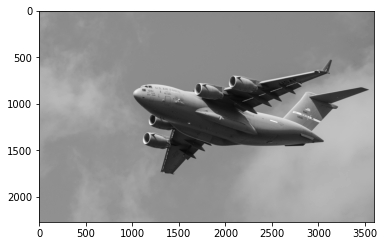

In [ ]:
#  흑백 이미지 출력하기
plt.imshow(image_gry, cmap="gray"), plt.axis("on")
plt.show()

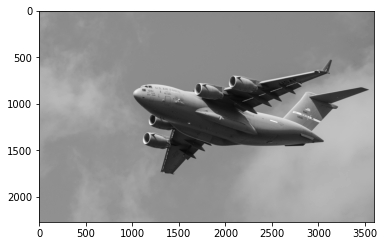

In [ ]:
# (2) 의 방법으로 로딩했을 경우 copy한 경로 넣어준다.
image_gry=cv2.imread("/content/drive/MyDrive/plane.jpg",cv2.IMREAD_GRAYSCALE)

plt.imshow(image_gry, cmap="gray"), plt.axis("on")
plt.show()



>  plt.axis()

>  (x, y)축에 관한 옵션을 다루는 메소드
 
*   plt.axis('on') - 축과 이름들을 보여줌 / 원래 보여주기에 쓸 필요없는 기능


*   plt.axis('off') - 축과 이름들을 제거 
*   plt.axis('equal') -  x축과 y축의 비율을 실제 똑같은 비율로 나오게하는 메소드 
*   plt.axis('scaled') - x축과 y축의 비율을 실제 똑같은 비율로 나오게하는  메소드, 그리고 여백을 축소함
*   plt.axis('tight')  -모든 자료가 보이도록 축 범위를 조밀하게 조정
*   plt.axis('image')  - 모든 자료가 보이도록 축 범위를 자료를 구한 값으로 조정한다




<function matplotlib.pyplot.show>

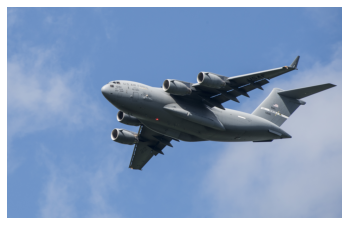

In [ ]:
# 컬러 이미지 출력을 위해 RGB로 변환
image_rgb=cv2.cvtColor(image_bgr,cv2.COLOR_BAYER_BG2RGB)

# 컬러 이미지 출력
plt.imshow(image_rgb), plt.axis("off")
plt.show

 *   OpenCV는 BGR을 기준으로 하며, Matplotlib는 RGB를 기준으로 한다


In [ ]:
# 데이터 타입을 확인한다
## 행렬로 변환된 이미지 확인
type(image_gry)

numpy.ndarray

In [ ]:
# 이미지 데이터 확인
## 행렬의 각 원소는 개별 픽셀에 해당한다
image_gry

array([[140, 136, 146, ..., 132, 139, 134],
       [144, 136, 149, ..., 142, 124, 126],
       [152, 139, 144, ..., 121, 127, 134],
       ...,
       [156, 146, 144, ..., 157, 154, 151],
       [146, 150, 147, ..., 156, 158, 157],
       [143, 138, 147, ..., 156, 157, 157]], dtype=uint8)

In [ ]:
# 차원을 확인
## 행렬의 차원 = 이미지 해상도
image_gry.shape

(2270, 3600)

In [ ]:
# 픽셀 확인
image_gry[0,0]

140

In [ ]:
image_bgr[0,0]

array([195, 144, 111], dtype=uint8)

In [ ]:
image_rgb[0,0]

array([111, 144, 195], dtype=uint8)

## **8.2 이미지 저장하기**

**이미지 저장하기**


> imwrite (file_name, image)
-> 특정한 이미지를 파일로 저장



In [ ]:
# 이미지 로드
image=cv2.imread("plane.jpg",cv2.IMREAD_GRAYSCALE)

# 이미지 저장
cv2.imwrite("plane_gray.jpg", image)

True

## **8.3 이미지 크기 변경하기**

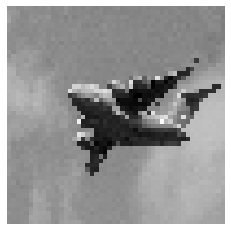

In [ ]:
# 이미지 로드
image=cv2.imread("plane.jpg",cv2.IMREAD_GRAYSCALE)

# 이미지 크기 변경
image_50X50 = cv2.resize(image,(50,50))

# 이미지 출력
plt.imshow(image_50X50, cmap="gray"),plt.axis("off")
plt.show()

*머신러닝에서 많이 사용하는 이미지 크기는 32x32, 64x64, 96x96, 256x256*

## **8.4 이미지 자르기**



*   배열 슬라이싱을 사용해 이미지를 자를 수 있다 
*   행렬로 표현한 이미지의 남기고 싶은 행과 열을 선택하여 자른다



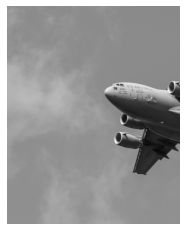

In [ ]:
# 이미지 로드
image=cv2.imread("plane.jpg",cv2.IMREAD_GRAYSCALE)

# 열의 처음 절반과 모든 행을 선택한다.
image_cropped = image[:,:1800]

# 이미지 출력
plt.imshow(image_cropped, cmap="gray"),plt.axis("off")
plt.show()

## **8.5 이미지 흐리게 하기**



*   이미지를 흐리게 하기 위해서는 각 픽셀을 주변 픽셀의 평균값으로 변환한다
*   kernel 연산을 사용한다
* kernel의 크기는 흐림의 정도를 결정하다 (클수록 이미지가 더 부드러워짐)


---
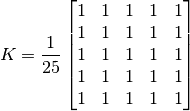

* kernel(filter)는 위와 같은 행렬을 의미한다

Flter가 적용되는 방법은
* 이미지 각 pixel에 kernel을 적용한다
* 각 pixcel에 위 kernel을 올려놓고, 그 영역안에 포함되는 값의 sum을 한 후에 25로 나눈다
* 평균으로 나온 값을 pixel에 적용한다


**OpenCV에는 4가지 형태의 blurring 방법을 제공
(1) Averaging**

blur 매소드
*Box 형태의 kernel을 이미지에 적용한 후 평균값을 box의 중심점에 적용



*   cv2.blur(img, (val,val))
*  img: 블러링 필터를 적용할 원본 이미지
* (val, val) 필터 커널 사이즈. 두 값이 달라도 무관함



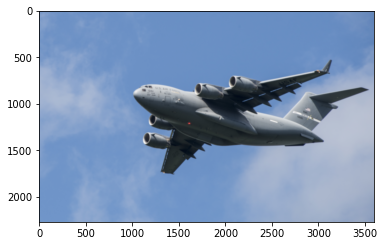

In [ ]:
# 이미지 로드
img=cv2.imread("plane.jpg")
b,g,r=cv2.split(img)
image=cv2.merge([r,g,b])

# 이미지를 흐리게 한다
image_blurry = cv2.blur(image, (10,10))

# 이미지 출력
plt.imshow(image_blurry)
plt.show()

* filter2D함수로 커널을 이미지에 직접 적용 
* 커넬의 중앙 원소가 변환되는 픽셀이고 나머지 원소가 그 픽셀의 이웃 - 미치는 영향값이 동일 하다는 점에서 유사

In [ ]:
# 커널을 만든다
kernel = np.ones((5,5)) / 25.0

# 커널을 확인
kernel

array([[0.04, 0.04, 0.04, 0.04, 0.04],
       [0.04, 0.04, 0.04, 0.04, 0.04],
       [0.04, 0.04, 0.04, 0.04, 0.04],
       [0.04, 0.04, 0.04, 0.04, 0.04],
       [0.04, 0.04, 0.04, 0.04, 0.04]])

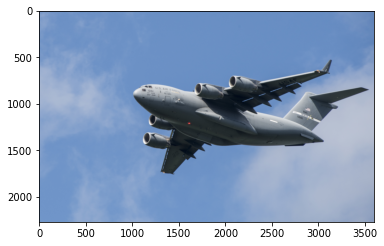

In [ ]:
# 커널을 적용
image_kernel = cv2.filter2D(image,-1,kernel)

#이미지 출력
plt.imshow(image_kernel)
plt.show()

**(2) 가우시안블러 적용** ** 가우시안 함수를 이용해서 kernel 행렬의 값을 생성하여 적용한다

* cv2.GaussianBlur(img, (val,val),0)
*(val,val) : 가우시안블러 필터. 두 개의 값이 달라도 되지만 모두 양의 홀수여야 함
* 이미지의 가우스 노이즈(전체적으로 밀도가 동일한, 백색노이즈) 를 제거하는 데 가장 효과적

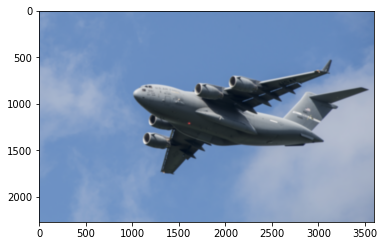

In [ ]:
# 가우시안 블러를 적용
image_very_blurry=cv2.GaussianBlur(image,(33,33),0)

# 이미지 출력
plt.imshow(image_very_blurry)
plt.show()

In [ ]:
gaus_vector=cv2.getGaussianKernel(5,0)
gaus_vector

array([[0.0625],
       [0.25  ],
       [0.375 ],
       [0.25  ],
       [0.0625]])

In [ ]:
# 벡터를 외적하여 커널을 만듬
gaus_kernel=np.outer(gaus_vector,gaus_vector)
gaus_kernel

array([[0.00390625, 0.015625  , 0.0234375 , 0.015625  , 0.00390625],
       [0.015625  , 0.0625    , 0.09375   , 0.0625    , 0.015625  ],
       [0.0234375 , 0.09375   , 0.140625  , 0.09375   , 0.0234375 ],
       [0.015625  , 0.0625    , 0.09375   , 0.0625    , 0.015625  ],
       [0.00390625, 0.015625  , 0.0234375 , 0.015625  , 0.00390625]])

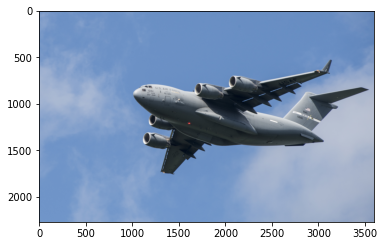

In [ ]:
# 커널을 적용
image_kernel = cv2.filter2D(image,-1,gaus_kernel)

# 이미지 출력
plt.imshow(image_kernel)
plt.show()

## **8.6 이미지 선명하게 하기**



*   중앙 픽셀을 부각하는 커널을 만든다
*  이미지의 경계선에서 대비가 더욱 두드러진다



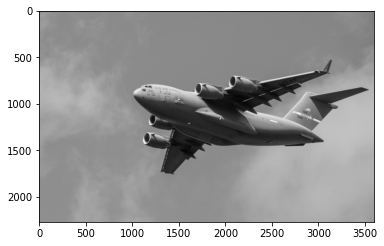

In [ ]:
# 이미지 로드
image=cv2.imread("plane.jpg",cv2.IMREAD_GRAYSCALE)

# 커널 만듬
kernel = np.array([[0,-1,0],
                   [-1,5,-1],
                   [0,-1,0]])

# 이미지를 선명하게 만듬
image_sharp = cv2.filter2D(image,-1,kernel)

# 이미지 출력
plt.imshow(image_kernel, cmap="gray")
plt.show()

## **8.7 대비 높이기**



> 히스토그램 평활화 histogram euqalization


*   객체의 형태가 두드러지도록 만들어주는 이미지 처리 도구
*   관심 대상 vs 다른 객체, 배경 이 잘 구분되도록 만들어줌
*   픽셀값의 범위가 커지도록 이미지를 변환





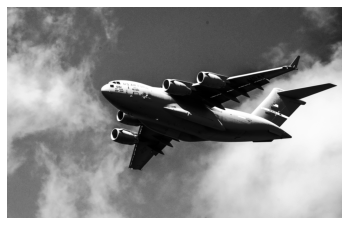

In [ ]:
# 흑백 이미지 로드
image=cv2.imread("plane.jpg",cv2.IMREAD_GRAYSCALE)

# 흑백 이미지에는 equlizeHist 함수 바로 적용
image_enhanced = cv2.equalizeHist(image)

# 이미지 출력
plt.imshow(image_enhanced, cmap="gray"),plt.axis("off")
plt.show()

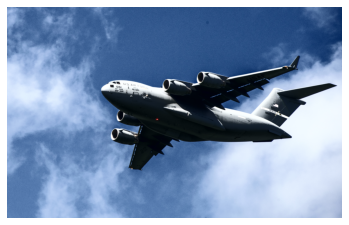

In [ ]:
# 컬러 이미지 로드
image_bgr=cv2.imread("plane.jpg",cv2.IMREAD_COLOR)

# YUV로 바꾼다
image_yuv =cv2.cvtColor(image_bgr, cv2.COLOR_BGR2YUV)

# 히스토그램 평활화를 적용
image_yuv[:,:,0]=cv2.equalizeHist(image_yuv[:,:,0])

# RGB로 바꾼다
image_rgb = cv2.cvtColor(image_yuv, cv2.COLOR_YUV2RGB)

# 이미지 출력
plt.imshow(image_rgb),plt.axis("off")
plt.show()

RGB  빛의 3원색을 이용하여 표현함. 풍부하고 정확, 데이터가 큼

YUV 밝기와 두 색을 이용함

## 8.8 색깔 구분하기

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from google.colab import files
uploaded = files.upload() # 파일 업로드 기능 실행

for fn in uploaded.keys(): # 업로드된 파일 정보 출력
    print('User uploaded file "{name}" with length {length} bytes'.format(
        name=fn, length=len(uploaded[fn])))

Saving adthreshold.png to adthreshold.png
Saving hue_circle.jpg to hue_circle.jpg
Saving plane.jpg to plane.jpg
Saving plane_256x256.jpg to plane_256x256.jpg
Saving saturation.jpg to saturation.jpg
Saving threshold.png to threshold.png
Saving value.jpg to value.jpg
User uploaded file "adthreshold.png" with length 172796 bytes
User uploaded file "hue_circle.jpg" with length 299788 bytes
User uploaded file "plane.jpg" with length 4937732 bytes
User uploaded file "plane_256x256.jpg" with length 22974 bytes
User uploaded file "saturation.jpg" with length 536145 bytes
User uploaded file "threshold.png" with length 568697 bytes
User uploaded file "value.jpg" with length 179240 bytes


## 이미지 개념 설명
##이미지 데이터 ---- 픽셀이라는 작은 이미지를 직사각형 형태로 모은것
### 개별 원소(픽셀)로 이루어진 행렬의 집합
## 픽셀 ---- 단색의 직사각형
#### 강도 (intensity) 와 채널( channel) 값을 가짐
#### 강도는 0~255, 채널은 보통 R, G, B로 구성
#### 채널이 하나인 그레이 스케일 이미지는 세로픽셀 X 가로픽셀 X 1
#### 채널이 3 개인 컬러 이미지는 세로픽셀 X 가로픽셀 X 3
## 이미지 크기 ---- 세로픽셀수 X  가로픽셀수 형식으로 표현
## 색공간(color space) ---- 픽셀의 색을 숫자로 표현하는 방식

### 그레이 스케일(gray scale) 
#### 모든 색이 흑백. 각 픽셀은 명도를 나타내는 숫자로 표현
#### 0 은 검은색을 나타내고 숫자가 커질수록 명도가 증가하여 하얀색이 됨. 보통 0~255의 8비트 부호없는 정수로 저장됨

### RGB (Red Green Blue)
####  색은 적(Red), 녹(Green), 청(Blue) 의 3가지 색의 명도를 뜻하는 숫자 3개가 합쳐진 벡터로 표현됨
#### Red는 (255, 0, 0) , Green (0, 255, 0) , Blue (0, 0, 255)
#### 픽셀데이터가 벡터 이므로 2차원 배열이 아닌 ( 세로픽셀수 X 가로픽셀수 X 색채널(channel)) 형태의 3차원 배열로 저장

### HSV ( Hue, Saturation, Value )
#### 색상(Hue) ----- 색상값 H 는 가시광선 스펙트럼을 주파수 별로 고리모양으로 배치했을 때의 각도...0 도 ~ 360 도 의 범위를 갖고 360도 와 0도는 빨강을 의미
#### 채도(Saturation) ----- 채도값 S 는 특정한 색상의 진함의 정도. 가장 진한 상태는 100% (순색, 섞임이없는색), 가장 채도가 낮은 0% 색은 무색
#### 명도(Value) ----- 명도값 V 는 밝은 정도. 명도가 높을수록 흰색에 가깝고, 명도가 낮을수록 검정색에 가까워진다

(-0.5, 1772.5, 1182.5, -0.5)

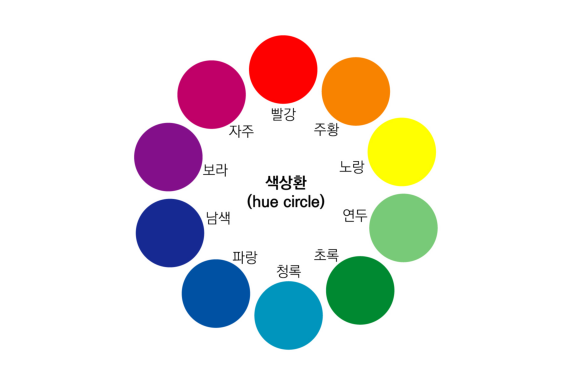

In [ ]:
hue_circle = cv2.imread('hue_circle.jpg')
hue = cv2.cvtColor(hue_circle, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(10,10))
plt.imshow(hue)
plt.axis('off')


(-0.5, 1772.5, 1182.5, -0.5)

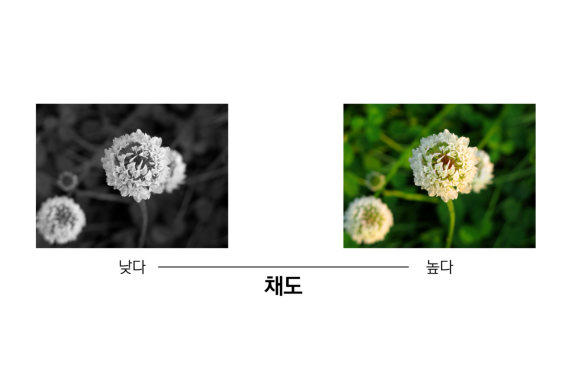

In [ ]:
saturation = cv2.imread('saturation.jpg')
saturation = cv2.cvtColor(saturation, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(10,10))
plt.imshow(saturation)
plt.axis('off')

(-0.5, 1772.5, 1182.5, -0.5)

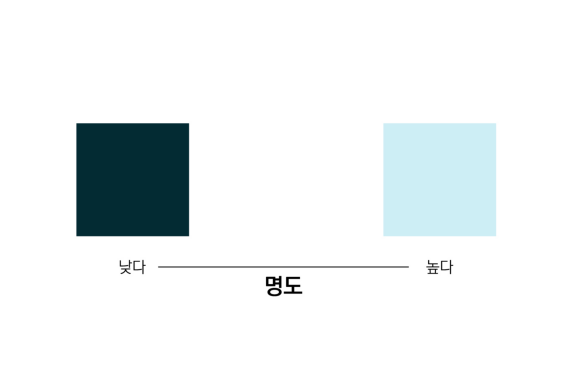

In [ ]:
value = cv2.imread('value.jpg')
value = cv2.cvtColor(value, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(10,10))
plt.imshow(value)
plt.axis('off')

이미지에서 1개의 색깔 구분하기

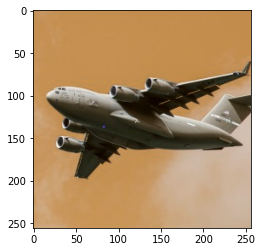

In [ ]:
# 이미지를 로드하기
image_bgr = cv2.imread('plane_256x256.jpg')
plt.imshow(image_bgr)

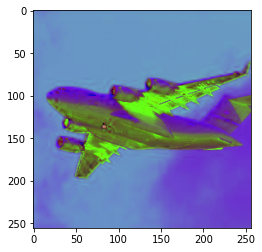

In [ ]:
# BGR 에서 HSV (색상, 채도, 명도)로 변환하기
image_hsv = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2HSV)
plt.imshow(image_hsv)

lower_blue ---- 파란색의 최저값 

upper_blue ---- 파란색의 최대 범위

In [ ]:
# HSV 에서 파랑 값의 범위 지정
lower_blue = np.array([50,100,50])
upper_blue = np.array([130,255,255])

마스크란? 

작업이 적용될 영역과 적용되지 않을 영역을 분리했을 때, 적용되지 않을 영역을 말하는 용어

2 , 3번째 파라미터에 각각 이미지 픽셀값의 최저, 최대 범위가 입력되고 첫번쨰 파라미터로 입력된 것이 그 사이 범위에 포함되는지 판단.

포함되면 흰색, 나머지는 검은색으로 나타냄.

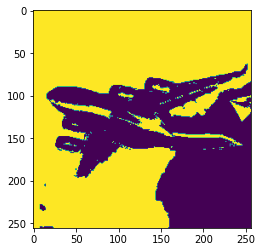

In [ ]:
# 마스크 만들기
img_mask = cv2.inRange(image_hsv, lower_blue, upper_blue)
plt.imshow(img_mask)

바이너리 이미지(img_mask) 를 마스크로 사용해서 원본이미지(img_bgr) 에서 범위값(AND 연산) 에 해당하는 부분 획득

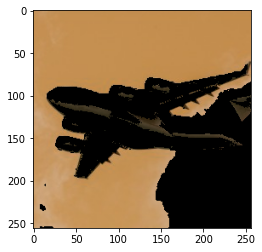

In [ ]:
# 이미지에 마스크 적용하기
image_bgr_masked = cv2.bitwise_and(image_bgr, image_bgr, mask=img_mask)
plt.imshow(image_bgr_masked)

OpenCV 는 기본적으로 이미지를 BGR 타입으로 읽는데, Matplotlib 등 대부분의 이미지 라이브러리는 RGB 타입을 사용하기 때문에 BGR 을 RGB 타입으로 변경해주는것이 좋다

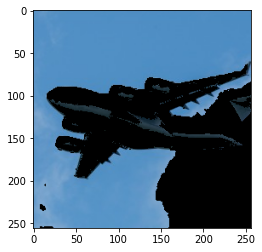

In [ ]:
# BGR 에서 RGB로 변환하기
image_rgb = cv2.cvtColor(image_bgr_masked, cv2.COLOR_BGR2RGB)
plt.imshow(image_rgb)

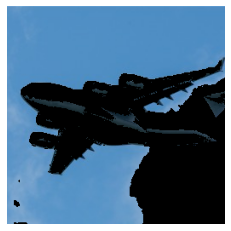

In [ ]:
# 이미지 출력하기
plt.imshow(image_rgb), plt.axis('off')
plt.show()

OpenCV 색깔 구분은 직관적

1) 이미지를 HSV(색상, 채도, 명도)로 변환

2) 격리시킬 값의 범위를 정의 (가장 어렵고 시간이 많이 드는 작업)

3) 이미지에 적용할 마스크 만들기(마스크의 흰색영역만 유지)

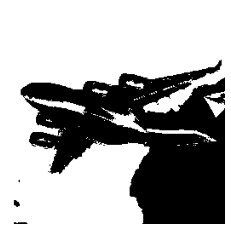

In [ ]:
# 마스크 출력하기
plt.imshow(img_mask, cmap='gray'), plt.axis('off')
plt.show()

## 8.9 이미지 이진화하기(임계처리)




주어진 임계값보다 큰 값을 가진 픽셀을 흰색으로 만들고 작은 값을 가진 픽셀은 검은색으로 만드는 과정

장점 : 대부분 중요한 요소를 유지하면서 이미지의 노이즈를 제거하는 것. 

예를들어 인쇄물을 찍는 사진에서 글자를 분리해내기 위해 자주 사용

threshold( src , thresh , maxval , type) 

--- src : 그레이스케일 이미지

--- thresh : 기준값

--- maxval : 기준값을 넘었을 때 적용할 최대값

--- type : 임계처리 유형

        1) THRESH_BINARY : 기준값을 넘으면 최대값 아니면 0

        2) THRESH_BINARY_INV ; 기준값을 넘으면 0 아니면 최대값 

        3) THRESH_TRUNC : 기준값을 넘으면 기준값 아니면 최대값

        4) THRESH_TOZERO : 기준값을 넘으면 원래값 아니면 0

        5) THRESH_TOZERO_INV : 기준값을 넘으면 0 아니면 원래값





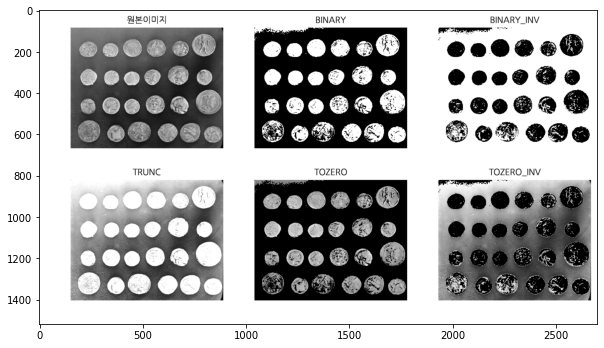

In [ ]:
threshold = cv2.imread('threshold.png', cv2.IMREAD_COLOR)
threshold = cv2.cvtColor(threshold, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(10,10))
plt.imshow(threshold)

적응적 이진화( 고급기술)

----- 픽셀의 임계값이 주변 픽셀의 강도에 의해 결정

----- 이미지 안의 영역마다 빛 조건이 달라질때 도움됨

adaptiveThreshold (src, maxValue, adaptiveMethod, thresholdType, blockSize, C)

--- src : 그레이스케일 이미지

--- maxValue : 기준값을 넘었을 때 적용할 값

--- adaptiveMethod : 영역 내에서 기준값을 계산하는 방법.

        1) ADAPTIVE_THRESH_MEAN_C: 영역 내의 평균값에 C를 뺀 값을 기준값으로 사용

        2) ADAPTIVE_THRESH_GAUSSIAN_C: 영역에 가우시안 블러를 적용한 후 C를 뺀 값을 기준값으로 사용

--- thresholdType : 임계처리 유형

        1) THRESH_BINARY

        2) THRESH_BINARY_INV
        
--- blockSize : 임계처리를 적용할 영역의 크기

--- C : 평균이나 가중평균에서 차감할 값

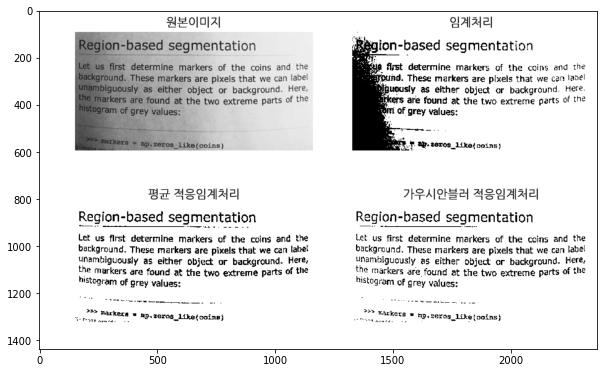

In [ ]:
adthreshold = cv2.imread('adthreshold.png', cv2.IMREAD_COLOR)
adthreshold = cv2.cvtColor(adthreshold, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(10,10))
plt.imshow(adthreshold)

In [ ]:
image_grey = cv2.imread('plane_256x256.jpg', cv2.IMREAD_GRAYSCALE)

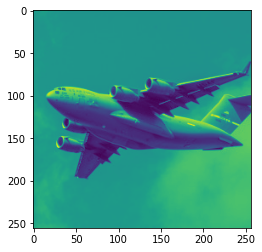

In [ ]:
plt.imshow(image_grey)

In [ ]:
# max_output_value = 출력 픽셀 강도의 최대값
max_output_value = 255
neighborhood_size = 99
subtract_from_mean = 10
# cv2.ADAPTIVE_THRESH_GAU
image_binarized = cv2.adaptiveThreshold(image_grey,
                                        max_output_value,
                                        #cv2.ADAPTIVE_THRESH_GAUSSIAN_C = 픽셀의 임계값을 주변 픽셀 강도의 가중치 합으로 설정
                                        # 여기서 가중치는 가우시안 윈도우에 의해 결정됨
                                        # cv2.ADAPTIVE_THRESH_MEAN_C 로 주변 픽셀의 평균을 임계값으로 설정 가능
                                        cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                        cv2.THRESH_BINARY,
                                        neighborhood_size,
                                        subtract_from_mean)

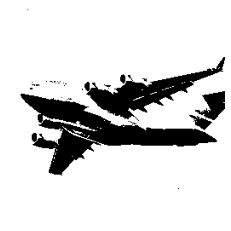

In [ ]:
plt.imshow(image_binarized, cmap='gray'), plt.axis('off')
plt.show()

cv2.ADAPTIVE_THRESH_MEAN_C 적용해보기

In [ ]:
image_mean_threshold = cv2.adaptiveThreshold(image_grey,
                                        max_output_value,
                                        cv2.ADAPTIVE_THRESH_MEAN_C,
                                        cv2.THRESH_BINARY,
                                        # neighborhood_size = 블록 크기(픽셀의 임계값 결정에 사용하는 주변 영역의 크기)
                                        neighborhood_size,
                                        # subtract_from_mean = 계산된 임계값에서 뺄 상수(임계값을 수동으로 미세 조정하는데 사용)
                                        subtract_from_mean)

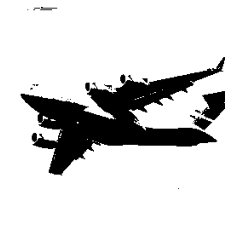

In [ ]:
plt.imshow(image_mean_threshold, cmap='gray'), plt.axis('off')
plt.show()

## 8.10 배경 제거하기

In [ ]:
# 이미지를 로드하고 RGB로 변환하기
image_bgr = cv2.imread('plane_256x256.jpg')

image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)

In [ ]:
# 사각형의 좌표: 시작점의 x, 시작점의 y, 너비, 높이
rectangle = (0, 56, 256, 150)

In [ ]:
# 초기 마스크 만들기
mask = np.zeros(image_rgb.shape[:2], np.uint8)

In [ ]:
mask[100:130]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [ ]:
# grabCut에 사용할 임시 배열을 만들기
# 1 행, 65열
# datatype default 값이 np.float64
bgdModel = np.zeros((1,65), np.float64)
fgdModel = np.zeros((1,65), np.float64)

In [ ]:
bgdModel

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0.]])

In [ ]:
# grabCut 실행
cv2.grabCut(image_rgb, # 원본 이미지
            mask, # 마스크
            rectangle, # 사각형
            bgdModel, # 배경을 위한 임시 배열
            fgdModel, # 전경을 위한 임시 배열
            5, # 반복 횟수
            cv2.GC_INIT_WITH_RECT) # 사각형을 사용한 초기화

In [ ]:
mask[100:130]

array([[2, 2, 2, ..., 3, 3, 3],
       [2, 2, 2, ..., 3, 3, 3],
       [2, 2, 2, ..., 3, 3, 3],
       ...,
       [2, 2, 2, ..., 3, 3, 3],
       [2, 2, 2, ..., 3, 3, 3],
       [2, 2, 2, ..., 3, 3, 3]], dtype=uint8)

In [ ]:
# 배경인 곳은 0, 그외에는 1로 설정한 마스크 만들기
mask_2 = np.where((mask==2) | (mask==0), 0, 1).astype('uint8')

In [ ]:
mask_2[100:140]

array([[0, 0, 0, ..., 1, 1, 1],
       [0, 0, 0, ..., 1, 1, 1],
       [0, 0, 0, ..., 1, 1, 1],
       ...,
       [0, 0, 0, ..., 1, 1, 1],
       [0, 0, 0, ..., 1, 1, 1],
       [0, 0, 0, ..., 1, 1, 1]], dtype=uint8)

In [ ]:
# 이미지에 새로운 마스크를 곱해 배경을 제외하기
image_rgb_nobg = image_rgb * mask_2[:,:,np.newaxis]

(<matplotlib.image.AxesImage at 0x7f4048c340b8>, (-0.5, 255.5, 255.5, -0.5))

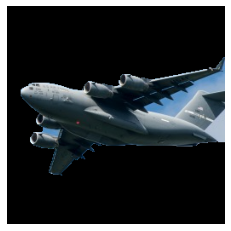

In [ ]:
plt.imshow(image_rgb_nobg),plt.axis('off')

그랩컷이 잘 작동해도 여전히 이미지에 남은 배경이 있다.

하나씩 지정해서 지울수있지만 실무에서 수천장을 고치는건 불가능하기 때문에 
이미지에 일부 배경이 남아있는것을 수용하자

1) 먼저 전경(비행기)이 들어있는 영역 주위를 사각형을 표시

2) 그랩컷은 이 사각형 밖에 있는 모든 것이 배경이라고 가정하고 이 정보를 사용해 사각형 안의 배경을 찾음

3) 그 다음 배경과 전경 영역을 구분할 수 있는 마스크 제작

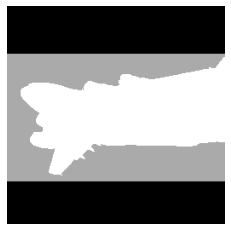

In [ ]:
plt.imshow(mask, cmap='gray'), plt.axis('off')
plt.show()

4) 검은 영역은 배경이라고 확실하게 가정한 사각형의 바깥쪽 영역

5) 회색 영역은 그랩컷이 배경이라고 생각하는 영역

6) 흰색 영역은 전경

7) 이 마스크를 사용해서 검은영역과 회색 영역을 합친 두번째 마스크 제작

8) 두번째 마스크를 이미지에 적용하고 전경만 남긴다

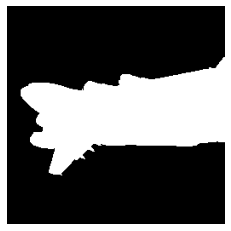

In [ ]:
plt.imshow(mask_2, cmap='gray'), plt.axis('off')
plt.show()

## 8.11 경계선 감지하기(이미지에 있는 경계선 찾기)

경계선은 많은 정보가 담긴 영역. 중요함.

--- 하늘 배경에 비행기가 나타났을 때, 경계선 감지를 통해 물체의 형태도 알수있고 정보가 적은 영역은 제거하고 대부분의 정보가 담긴 이미지 영역 구분 가능

--- 캐니 경계선 감지기 사용.

----- 그레디언트(gradient) 임계값의 저점과 고점을 나타내는 두 매개변수 필요

----- 낮음 임계값과 높은 임계값 사이의 가능성 있는 경계선 픽셀은 약한 경계선 픽셀로 간주

----- 높은 임계값보다 큰 픽셀은 강한 경계선 픽셀로 간주

In [ ]:
# 흑백 이미지 로드
image_gray = cv2.imread('plane_256x256.jpg', cv2.IMREAD_GRAYSCALE)

In [ ]:
# 픽셀 강도의 중간값 계산하기
median_intensity = np.median(image_gray)

In [ ]:
# 중간 픽셀 강도에서 위아래 1 표준편차 떨어진 값을 임계값으로 지정하기
lower_threshold = int(max(0, (1.0 - 0.33) * median_intensity))
upper_threshold = int(min(255, (1.0+0.33) * median_intensity))

canny = cv2.Canny (원본 이미지, 임계값 1, 임계값2, 커널크기(aperture size), L2그라디언트)

---- 임계값 1 (threshold 1) = 임계값 1 이하에 포함된 가장자리는 가장자리에서 제외

---- 임계값 2 (threshold 2) = 임계값 2 이상에 포함된 가장자리는 가장자리로 간주

---- 커널 크기(aperture size) = sobel 마스크의 aperture size, 자동으로 할당

---- L2 gradient = L2 방식의 사용 유무, default 값은 L1 gradient

In [ ]:
# 캐니 경계선 감지기를 적용하기
image_canny = cv2.Canny(image_gray, lower_threshold, upper_threshold)

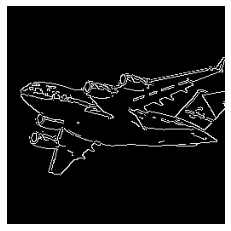

In [ ]:
# 이미지 출력하기
plt.imshow(image_canny, cmap='gray'), plt.axis('off')
plt.show()

## 8.12 모서리 감지하기

해리스 모서리 감지기

--- 두 개의 경계선이 교차하는 지점을 감지하는 방법

--- 윈도(이웃이나 패치) 안의 픽셀이 작은 움직임에도 크게 변하는 윈도를 찾는것

In [ ]:
# 흑백 이미지 로드하기
image_bgr = cv2.imread('plane_256x256.jpg')
image_gray = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2GRAY)
image_gray = np.float32(image_gray)

block_size = 각 픽셀에서 모서리 감지에 사용되는 이웃 픽셀 크기

aperture = 사용하는 sobel 커널 크기

free_parameter = 값이 클수록 부드러운 모소리를 구별

In [ ]:
# 모서리 감지 매개변수 설정하기
block_size = 2
aperture = 29
free_parameter = 0.04

In [ ]:
# 모서리 감지하기
detector_responses = cv2.cornerHarris(image_gray,
                                      block_size,
                                      aperture,
                                      free_parameter)

In [ ]:
# 모서리 표시 부각하기
detector_responses = cv2.dilate(detector_responses, None)

In [ ]:
# 임계값보다 큰 감지 결과만 남기고 흰색으로 표시하기
threshold = 0.02
image_bgr[detector_responses > threshold * detector_responses.max()] = [255,255,255]

In [ ]:
image_gray = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2GRAY)

(<matplotlib.image.AxesImage at 0x7f4048ffad30>, (-0.5, 255.5, 255.5, -0.5))

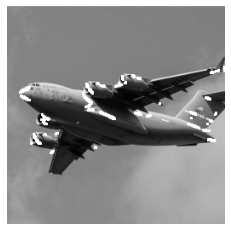

In [ ]:
plt.imshow(image_gray, cmap="gray"), plt.axis("off")

(<matplotlib.image.AxesImage at 0x7f4048b725f8>, (-0.5, 255.5, 255.5, -0.5))

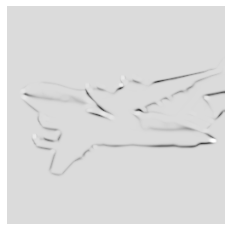

In [ ]:
plt.imshow(detector_responses, cmap='gray'),plt.axis('off')

Shi-Tomasi 모서리 감지기(goodFeaturesToTrack)

--- 뚜렷하게 나타난 모서리를 지정된 개수만큼 찾을 수 있음

corners_to_detect = 감지할 모서리 개수

minimum_quality_score = 모서리가 될 최소 품질 (0에서 1 사이)

minimum_distance = 모서리 사이의 최소 유클리드 거리

In [ ]:
# 이미지 로드
image_bgr = cv2.imread('plane_256x256.jpg')
image_gray = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2GRAY)

In [ ]:
# 감지할 모서리 개수
corners_to_detect = 10
minimum_quality_score = 0.05
minimum_distance = 25

In [ ]:
# 모서리 감지
corners = cv2.goodFeaturesToTrack(image_gray,
                                  corners_to_detect,
                                  minimum_quality_score,
                                  minimum_distance)

In [ ]:
corners=np.float32(corners)

In [ ]:
#모서리마다 흰원 그리기
for corner in corners:
    x, y = corner[0]
    cv2.circle(image_bgr, (x,y), 10, (255,255,255), -1)

In [ ]:
# 흑백 이미지로 변환하기
image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2GRAY)

(<matplotlib.image.AxesImage at 0x7f4048cd7be0>, (-0.5, 255.5, 255.5, -0.5))

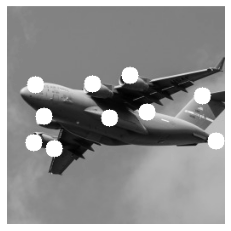

In [ ]:
plt.imshow(image_rgb, cmap='gray'),plt.axis('off')

## 8.13 머신러닝 특성 만들기

In [ ]:
# 이미지를 머신러닝에 필요한 샘플로 변환하기 

# 흑백 이미지 로드
image = cv2.imread('plane_256x256.jpg', cv2.IMREAD_GRAYSCALE)

image

array([[152, 150, 149, ..., 142, 142, 142],
       [137, 135, 134, ..., 128, 127, 127],
       [135, 133, 133, ..., 127, 126, 126],
       ...,
       [150, 150, 151, ..., 168, 167, 167],
       [151, 151, 152, ..., 167, 166, 166],
       [152, 152, 153, ..., 167, 166, 166]], dtype=uint8)

In [ ]:
# 이미지를 10 x 10 픽셀 크기로 변환
image_10x10 = cv2.resize(image, (10,10))

image_10x10

array([[133, 130, 130, 129, 130, 129, 129, 128, 128, 127],
       [135, 131, 131, 131, 130, 130, 129, 128, 128, 128],
       [134, 132, 131, 131, 130, 129, 129, 128, 130, 133],
       [132, 158, 130, 133, 130,  46,  97,  26, 132, 143],
       [141,  36,  54,  91,   9,   9,  49, 144, 179,  41],
       [142,  95,  32,  36,  29,  43, 113, 141, 179, 187],
       [141, 124,  26,  25, 132, 135, 151, 175, 174, 184],
       [143, 151,  38, 133, 134, 139, 174, 177, 169, 174],
       [155, 141, 135, 137, 137, 152, 169, 168, 168, 179],
       [152, 139, 136, 135, 137, 143, 159, 166, 171, 175]], dtype=uint8)

In [ ]:
# 이미지 데이터를 1차원 벡터로 변환
image_10x10.flatten()

array([133, 130, 130, 129, 130, 129, 129, 128, 128, 127, 135, 131, 131,
       131, 130, 130, 129, 128, 128, 128, 134, 132, 131, 131, 130, 129,
       129, 128, 130, 133, 132, 158, 130, 133, 130,  46,  97,  26, 132,
       143, 141,  36,  54,  91,   9,   9,  49, 144, 179,  41, 142,  95,
        32,  36,  29,  43, 113, 141, 179, 187, 141, 124,  26,  25, 132,
       135, 151, 175, 174, 184, 143, 151,  38, 133, 134, 139, 174, 177,
       169, 174, 155, 141, 135, 137, 137, 152, 169, 168, 168, 179, 152,
       139, 136, 135, 137, 143, 159, 166, 171, 175], dtype=uint8)

이미지는 픽셀 격자로 표현

--- 흑백일 때 각 픽셀은 하나의 값으로 표현됨 ( 픽셀 강도가 흰색이면 1, 검정이면 0 )

(<matplotlib.image.AxesImage at 0x7f4049039518>, (-0.5, 9.5, 9.5, -0.5))

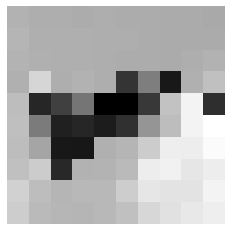

In [ ]:
plt.imshow(image_10x10, cmap='gray'), plt.axis('off')

In [ ]:
image_10x10.shape

(10, 10)

In [ ]:
image_10x10.flatten().shape

(100,)

컬러 이미지일땐 각 픽셀이 여러개의 값( 보통 3개)로 표현

--- 채널(빨강,초록,파랑 등)을 나타내는 각 값이 합쳐져서 최종 색 만듦 (10x10 크기 컬러 이미지는 샘플마다 300개의 특성값 존재)

In [ ]:
# 컬러 이미지 로드
image_color = cv2.imread('plane_256x256.jpg', cv2.IMREAD_COLOR)

In [ ]:
# 이미지를 10x10 픽셀 크기로 변환
image_color_10x10 = cv2.resize(image_color, (10,10))

In [ ]:
image_color_10x10

array([[[197, 145,  85],
        [196, 143,  80],
        [196, 143,  80],
        [195, 142,  79],
        [197, 143,  80],
        [196, 142,  79],
        [196, 142,  79],
        [195, 141,  78],
        [195, 141,  78],
        [194, 140,  77]],

       [[199, 146,  89],
        [197, 144,  81],
        [197, 144,  81],
        [197, 144,  81],
        [197, 143,  80],
        [197, 143,  80],
        [196, 142,  79],
        [195, 141,  78],
        [195, 141,  78],
        [195, 141,  78]],

       [[198, 146,  86],
        [198, 144,  83],
        [197, 144,  81],
        [197, 144,  81],
        [196, 143,  80],
        [196, 143,  77],
        [196, 142,  79],
        [195, 141,  78],
        [195, 143,  82],
        [194, 147,  84]],

       [[198, 145,  82],
        [199, 166, 126],
        [197, 144,  77],
        [199, 146,  84],
        [186, 139,  89],
        [ 58,  52,  31],
        [109, 100,  88],
        [ 32,  28,  18],
        [174, 139, 103],
        [196, 152, 

In [ ]:
image_color_10x10.shape

(10, 10, 3)

In [ ]:
image_color_10x10.flatten()

array([197, 145,  85, 196, 143,  80, 196, 143,  80, 195, 142,  79, 197,
       143,  80, 196, 142,  79, 196, 142,  79, 195, 141,  78, 195, 141,
        78, 194, 140,  77, 199, 146,  89, 197, 144,  81, 197, 144,  81,
       197, 144,  81, 197, 143,  80, 197, 143,  80, 196, 142,  79, 195,
       141,  78, 195, 141,  78, 195, 141,  78, 198, 146,  86, 198, 144,
        83, 197, 144,  81, 197, 144,  81, 196, 143,  80, 196, 143,  77,
       196, 142,  79, 195, 141,  78, 195, 143,  82, 194, 147,  84, 198,
       145,  82, 199, 166, 126, 197, 144,  77, 199, 146,  84, 186, 139,
        89,  58,  52,  31, 109, 100,  88,  32,  28,  18, 174, 139, 103,
       196, 152, 105, 201, 151,  97,  47,  41,  21,  68,  59,  39, 103,
        94,  81,  24,  12,   0,  23,  12,   0,  87,  56,  22, 199, 154,
       102, 183, 180, 173,  57,  46,  26, 200, 153, 100, 134, 106,  59,
        40,  36,  23,  40,  41,  23,  34,  34,  18,  53,  47,  29, 124,
       118,  99, 152, 145, 127, 190, 182, 169, 206, 190, 174, 20

In [ ]:
image_color_10x10.flatten().shape

(300,)

(<matplotlib.image.AxesImage at 0x7f4048af2c18>, (-0.5, 9.5, 9.5, -0.5))

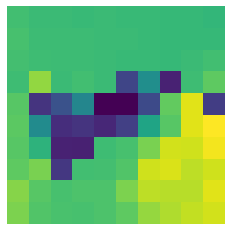

In [ ]:
plt.imshow(image_10x10), plt.axis('off')

이미지 처리의 어려움 ---- 이미지 모든 픽셀이 특성이 되기 때문에 이미지가 커질수록 특성의 개수도 늘어남

In [ ]:
# 흑백 이미지 로드
image_256x256_gray = cv2.imread('plane_256x256.jpg', cv2.IMREAD_GRAYSCALE)

In [ ]:
image_256x256_gray

array([[152, 150, 149, ..., 142, 142, 142],
       [137, 135, 134, ..., 128, 127, 127],
       [135, 133, 133, ..., 127, 126, 126],
       ...,
       [150, 150, 151, ..., 168, 167, 167],
       [151, 151, 152, ..., 167, 166, 166],
       [152, 152, 153, ..., 167, 166, 166]], dtype=uint8)

In [ ]:
image_256x256_gray.flatten()

array([152, 150, 149, ..., 167, 166, 166], dtype=uint8)

In [ ]:
# 이미지 데이터를 1차원 벡터로 변환하고 차원 출력
image_256x256_gray.flatten().shape

(65536,)

In [ ]:
# 컬러 이미지 로드
image_256x256_color = cv2.imread('plane_256x256.jpg', cv2.IMREAD_COLOR)

In [ ]:
image_256x256_color

array([[[212, 163, 107],
        [210, 161, 105],
        [209, 159, 106],
        ...,
        [208, 154,  93],
        [208, 154,  93],
        [208, 154,  93]],

       [[197, 148,  92],
        [195, 146,  90],
        [194, 144,  91],
        ...,
        [194, 140,  79],
        [193, 139,  78],
        [193, 139,  78]],

       [[195, 146,  90],
        [193, 144,  88],
        [193, 144,  88],
        ...,
        [193, 139,  78],
        [192, 138,  77],
        [192, 138,  77]],

       ...,

       [[205, 160, 109],
        [205, 160, 109],
        [204, 161, 112],
        ...,
        [198, 174, 146],
        [197, 173, 145],
        [197, 173, 145]],

       [[206, 161, 110],
        [206, 161, 110],
        [205, 162, 113],
        ...,
        [199, 172, 145],
        [198, 171, 144],
        [198, 171, 144]],

       [[207, 162, 111],
        [207, 162, 111],
        [206, 163, 114],
        ...,
        [199, 172, 145],
        [198, 171, 144],
        [198, 171, 144]]

In [ ]:
image_256x256_color.flatten()

array([212, 163, 107, ..., 198, 171, 144], dtype=uint8)

In [ ]:
image_256x256_color.flatten().shape

(196608,)

## 8.14 평균 색을 특성으로 인코딩하기

빨강,초록,파랑 채널의 평균값을 계산하여 이미지의 평균 컬러를 나타내는 3개의 컬러 특성 만들기

In [ ]:
# BGR 이미지로 로드
image_bgr = cv2.imread('plane_256x256.jpg', cv2.IMREAD_COLOR)

image_bgr.shape

(256, 256, 3)

In [ ]:
# 각 채널의 평균 계산
channels = cv2.mean(image_bgr)

channels

(169.0235595703125, 133.11940002441406, 90.52377319335938, 0.0)

In [ ]:
# 파랑과 빨강 바꾸기 (BGR 에서 RGB로 만들기)
observation = np.array([(channels[2], channels[1], channels[0])])

# 채널 평균값 확인
observation

array([[ 90.52377319, 133.11940002, 169.02355957]])

In [ ]:
observation.shape

(1, 3)

(-0.5, 2.5, 0.5, -0.5)

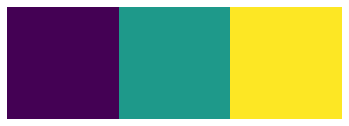

In [ ]:
plt.imshow(observation)
plt.axis('off')

## 8.15 컬러 히스토그램을 특성으로 인코딩하기

In [ ]:
#이미지에 나타난 컬러를 표현하는 일련의 특성 만들기

# 이미지 로드
image_bgr = cv2.imread('plane_256x256.jpg', cv2.IMREAD_COLOR)

In [ ]:
# RGB 로 변환
image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)

In [ ]:
# 특성값을 담을 리스트 만들기
features = []

cv2.calcHist(img, channel, mask, histSize, range)

In [ ]:
# 각 컬러 채널에 대해 히스토그램 계산
colors = ('r','g','b')

#각 채널을 반복하면서 히스토그램을 계산하고 리스트에 추가하기
for i, channel in enumerate(colors):
    histogram = cv2.calcHist([image_rgb],  #이미지
                              [i],  #채널 인덱스
                              None,  # 마스크 없음(이미지 전체에 대한 히스토그램)
                              [256],  # 히스토그램 크기, BIN 개수
                              [0, 256])  #픽셀값 범위
    features.extend(histogram)

In [ ]:
# 샘플의 특성값으로 벡터를 만들기
observation = np.array(features).flatten()

In [ ]:
observation[0:5]

array([1027.,  217.,  182.,  146.,  146.], dtype=float32)

각 컬러채널에도 히스토그램 적용가능

256개의 값으로 표현됨(채널에 가능한 값의 범위)

x축은 가능한 256개의 채널값을 나타냄, y축은 이미지의 모든 픽셀에서 나타난 특정 채널값의 횟수

In [ ]:
# 각 컬러 채널에 대한 히스토그램 계산
colors = ('r','g','b')

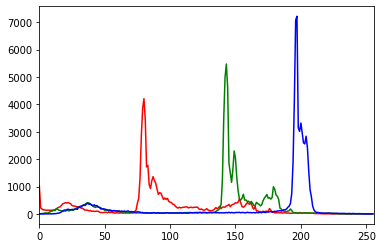

In [ ]:
# 컬러 채널을 반복하면서 히스토그램을 계산하고 그래프 그리기
for i , channel in enumerate(colors):
    histogram = cv2.calcHist([image_rgb],  #이미지
                             [i],  #채널 인덱스
                             None, # 마스크 없음
                             [256],  #히스토그램 크기
                             [0,256])  # 범위
    plt.plot(histogram, color=channel)
    plt.xlim([0,256])
    
plt.show()

컬러 채널마다 256개의 특성, 하나의 이미지에서 컬러 분포를 표현하는 768개의 특성 만들수 있다

# Chapter 9. 특성 추출을 사용한 차원 축소

9.0 소개

In [ ]:
#특성 추출: 특성에 내재된 정보를 많이 유지하면서 새로운 특성집합 생성 
#method 1: 주성분 사용 
#method 2: 클래스 분리 최대화 
#method 3: 행렬 분해 SVD 

9.1 주성분을 사용해 특성 줄이기

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn import datasets

In [ ]:
digits = datasets.load_digits()
features = StandardScaler().fit_transform(digits.data)
# if n_components > 1, return n featues // if 0 < n < 1, returns min num features with variance
# use 0.95 or 0.99 원본 특성의 95%, 99% 분산 유지
# whiten=True: 평균 = 0, 분산 = 1
pca = PCA(n_components=0.99, whiten=True)
features_pca = pca.fit_transform(features)
print(features.shape, features_pca.shape)

(1797, 64) (1797, 54)


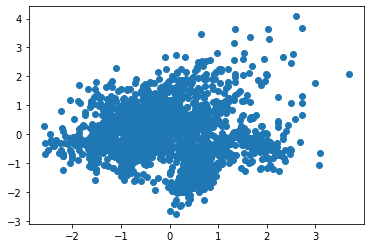

In [ ]:
 #whitening 적용 차이 
 import matplotlib.pyplot as plt
 plt.scatter(features_pca[:, 0], features_pca[:,1])
 plt.show()

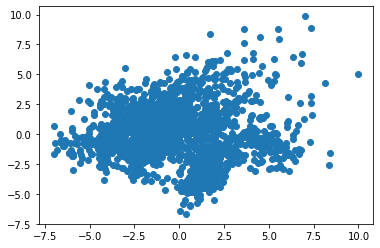

In [ ]:
pca_nowhiten = PCA(n_components=0.99)
features_nowhiten = pca_nowhiten.fit_transform(features)
plt.scatter(features_nowhiten[:, 0], features_nowhiten[:,1])
plt.show()

In [ ]:
# original features * pca -> features 
features.shape

(1797, 64)

In [ ]:
pca_nowhiten.components_.T.shape

(64, 54)

In [ ]:
features_nowhiten.shape

(1797, 54)

In [ ]:
import numpy as np
np.dot(features, pca_nowhiten.components_.T).shape


(1797, 54)

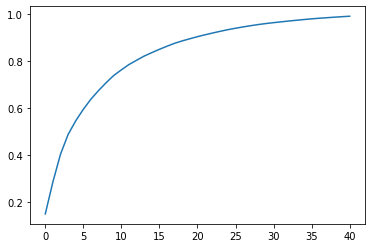

In [ ]:
#n_components 결정
pca.fit(digits.data)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.show()

9.2 선형적으로 구분되지 않은 데이터의 차원 축소하기

In [ ]:
#Kernel trick 
from sklearn.decomposition import KernelPCA
from sklearn.datasets import make_circles
features, _ = make_circles(n_samples = 1000, random_state=1, noise=0.1, factor=0.1)

In [ ]:
#RBF (radius basis function) 사용 Kernel PCA 적용
#rbf, sigmoid, ploy, linear(pca), etc
#n_components: 분산 설정 불가, 주성분 개수 지정
#hyperparameter = gamma 
kpca = KernelPCA(kernel="rbf", gamma=15, n_components=1)
features_kpca = kpca.fit_transform(features)
print(features.shape[1], features_kpca.shape[1])

2 1


9.3 클래스 분리를 최대화하여 특성 줄이기

In [ ]:
#LDA (Linear Discriminant Analysis) 선형 판별 분석
from sklearn import datasets
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

iris = datasets.load_iris()
features = iris.data
target = iris.target

lda = LinearDiscriminantAnalysis(n_components=1)
features_lda = lda.fit(features, target).transform(features)

print(features.shape[1], features_lda.shape[1])

4 1


In [ ]:
#n_components 값 결정하기 -> 분산의 임계값을 넘는 최소한의 수
lda = LinearDiscriminantAnalysis(n_components=None)
features_lda = lda.fit(features, target)
lda_var_ratios = lda.explained_variance_ratio_
lda_var_ratios

array([0.9912126, 0.0087874])

In [ ]:
def select_n_components(var_ratio, goal_var: float) -> int:
  total_variance = 0.0
  n_components = 0
  for explained_variance in var_ratio:
    total_variance += explained_variance
    n_components += 1
    if total_variance >= goal_var:
      break
  return n_components

select_n_components(lda_var_ratios, 0.95)

1

9.4 행렬 분해 사용 특성 줄이기

In [ ]:
#음수가 아닌 특성행열 차원 축소  
#NMF (non-negative matrix factorization)
from sklearn.decomposition import NMF
from sklearn import datasets

digits = datasets.load_digits()
features = digits.data

nmf = NMF(n_components=10, random_state=1)
features_nmf = nmf.fit_transform(features)

print(features.shape[1], features_nmf.shape[1])

64 10


In [ ]:
# V = WH 
# H
print('H: ', nmf.components_.shape)

# W
print('W:', features_nmf.shape)

H:  (10, 64)
W: (1797, 10)


9.5 희소한 데이터의 특성 줄이기

In [ ]:
#TSVD (Truncated Singular Value Decomposition) SVD 
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import TruncatedSVD
from scipy.sparse import csr_matrix
from sklearn import datasets
import numpy as np

In [ ]:
digits = datasets.load_digits()
features = StandardScaler().fit_transform(digits.data)
#희소 행열 만들기
features_sparse = csr_matrix(features)

In [ ]:
tsvd = TruncatedSVD(n_components=10)
features_sparse_tsvd = tsvd.fit(features_sparse).transform(features_sparse)
print(features_sparse.shape, features_sparse_tsvd.shape)

(1797, 64) (1797, 10)


# Chapter 10. 특성 선택을 사용한 차원 축소

10.0 소개 

In [ ]:
#특성 선택(feature selection)을 통해 차원을 축소
# method 1. 필터(filter)_통계적방법 2. 래퍼(wrapper)_시행착오 3. 임베디드(embedded)_훈련단계를 확장 또는 수정 

10.1 분산을 기준으로 수치 특성 선택하기 

In [ ]:
from sklearn import datasets
from sklearn.feature_selection import VarianceThreshold #분산 함수

In [ ]:
iris = datasets.load_iris()
features = iris.data
target = iris.target
features


array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [ ]:
thresholder = VarianceThreshold(threshold=.5)#기준값 설정 5%
features_high_variance = thresholder.fit_transform(features)#기준값보다 높은 특성을 선택
features_high_variance[0:10]#출력

array([[5.1, 1.4, 0.2],
       [4.9, 1.4, 0.2],
       [4.7, 1.3, 0.2],
       [4.6, 1.5, 0.2],
       [5. , 1.4, 0.2],
       [5.4, 1.7, 0.4],
       [4.6, 1.4, 0.3],
       [5. , 1.5, 0.2],
       [4.4, 1.4, 0.2],
       [4.9, 1.5, 0.1]])

In [ ]:
features.mean()

3.4644999999999997

In [ ]:
#분산 사용시 1. 분산은 원점 맞춰진 값 아님 2. 기준값 수동으로 계산(12장에서 추가로 배움)
thresholder.variances_   #각 특성의 분산 알 수 있다. 

array([0.68112222, 0.18871289, 3.09550267, 0.57713289])

10.2 분산을 기준으로 이진 특성 선택하기 


In [ ]:
#mission : 분산 특성에서 분산이 낮은 특성(적은 정보)를 삭제

In [ ]:
from sklearn.feature_selection import VarianceThreshold #분산 함수

In [ ]:
features = [[0, 1, 0],
            [0, 1, 1],
            [0, 1, 0],
            [0, 1, 1],
            [1, 0, 0]]
thresholder = VarianceThreshold(threshold=(.75*(1- .75)))#18.xx # p(1-p)
thresholder.fit_transform(features)

array([[0],
       [1],
       [0],
       [1],
       [0]])

In [ ]:
0.75*(1-0.75)

0.1875

In [ ]:
thresholder.variances_

array([0.16, 0.16, 0.24])

10.3 상관관계가 큰 특성 다루기 

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
features = np.array([[1, 1, 1],
                    [2, 2, 0],
                    [3, 3, 1],
                    [4, 4, 0],
                    [5, 5, 1],
                    [6, 6, 0],
                    [7, 7, 1],
                    [8, 7, 0],
                    [9, 7, 1]])

In [ ]:
dataframe = pd.DataFrame(features)#dataframe 으로 변환 
corr_matrix = dataframe.corr().abs() #corr() 상관관계 abs() 절대값
corr_matrix

,0,1,2
0,1.000000,0.976103,0.000000
1,0.976103,1.000000,0.034503
2,0.000000,0.034503,1.000000


In [ ]:
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
upper

,0,1,2
0,NaN,0.976103,0.000000
1,NaN,NaN,0.034503
2,NaN,NaN,NaN


In [ ]:
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]#상관계수가 0.95보다 큰 특성 열의 인덱스를 찾습니다. 
to_drop

[1]

In [ ]:
dataframe.drop(dataframe.columns[to_drop], axis =1).head(3)

,0,2
0,1,1
1,2,0
2,3,1


In [ ]:
dataframe.corr()[0:3]# 상관관계는 n * n 만 출력 

,0,1,2
0,1.000000,0.976103,0.000000
1,0.976103,1.000000,-0.034503
2,0.000000,-0.034503,1.000000


In [ ]:
upper

,0,1,2
0,NaN,0.976103,0.000000
1,NaN,NaN,0.034503
2,NaN,NaN,NaN


10.4 분류 작업에 관련 없는 특성 삭제하기 

In [ ]:
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, f_classif

In [ ]:
iris = load_iris()
features = iris.data
target = iris.target

In [ ]:
features.shape

(150, 4)

In [ ]:
features = features.astype(int)#int 형으로 변환

In [ ]:
chi2_selector = SelectKBest(chi2, k=2)#chi2가 카이제곱 통계값 가장 큰 특성 두개 
features_kbest = chi2_selector.fit_transform(features, target)

In [ ]:
fvalue_selector = SelectKBest(f_classif, k=2)
features_kbest = fvalue_selector.fit_transform(features, target)

In [ ]:
print("원본 특성 개수 : ", features.shape[1])
print("줄어든 특성 개수 : ", features_kbest.shape[1])

원본 특성 개수 :  4
줄어든 특성 개수 :  2


In [ ]:
#카이제곱 검정
target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [ ]:
import numpy as np
observed = np.sum(features.reshape(3, 50, 4), axis= 1)
observed

array([[230, 152,  50,   0],
       [274, 116, 191,  50],
       [304, 129, 255,  79]])

In [ ]:
expected = features.sum(axis =0)/3
expected

array([269.33333333, 132.33333333, 165.33333333,  43.        ])

In [ ]:
np.sum((observed-expected)**2/expected, axis=0) 

array([ 10.28712871,   5.02267003, 133.06854839,  74.27906977])

In [ ]:
#f-value
total_mean = np.mean(features, axis=0)
total_mean


array([5.38666667, 2.64666667, 3.30666667, 0.86      ])

In [ ]:
class_mean = np.mean(features.reshape(3, 50, 4), axis=1)
class_mean

array([[4.6 , 3.04, 1.  , 0.  ],
       [5.48, 2.32, 3.82, 1.  ],
       [6.08, 2.58, 5.1 , 1.58]])

In [ ]:
ss_between = np.sum(50*(class_mean - total_mean)**2, axis=0)
ss_between

array([ 55.41333333,  13.29333333, 440.01333333,  63.88      ])

In [ ]:
ss_total = np.sum((features - total_mean)**2, axis=0)
ss_total

array([105.57333333,  42.27333333, 467.89333333,  76.06      ])

In [ ]:
f = (ss_between/(3-1)) / ((ss_total - ss_between)/(150-3))
f

array([  81.19776715,   33.71497585, 1160.00645624,  385.48275862])

In [ ]:
fvalue_selector.scores_

array([  81.19776715,   33.71497585, 1160.00645624,  385.48275862])

10.5 재귀적 특성 제거하기 

In [ ]:
#cv cross-validation

In [ ]:
from sklearn.datasets import make_regression
from sklearn.feature_selection import RFECV 
from sklearn import datasets, linear_model 

In [ ]:
features, target = make_regression(n_samples = 10000,
                                   n_features = 100, 
                                   n_informative =2,
                                   random_state =1)

In [ ]:
ols = linear_model.LinearRegression()

In [ ]:
rfecv = RFECV(estimator =ols, step=1, scoring ="neg_mean_squared_error")
rfecv.fit(features, target)
rfecv.transform(features)

array([[ 0.00850799,  0.7031277 ],
       [-1.07500204,  2.56148527],
       [ 1.37940721, -1.77039484],
       ...,
       [-0.80331656, -1.60648007],
       [ 0.39508844, -1.34564911],
       [-0.55383035,  0.82880112]])

In [ ]:
rfecv.n_features_

2

In [ ]:
rfecv.support_

array([False, False, False, False, False,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False])

In [ ]:
rfecv.ranking_

array([33, 39, 42, 20,  6,  1, 82, 35, 32,  3, 10, 72, 24, 44, 12, 49, 93,
       84, 94,  2, 25, 21, 78, 31, 43, 50, 47, 52, 81, 23, 61, 96, 80, 14,
       15, 58, 75, 29, 83,  1, 18, 68, 46, 19, 30,  5, 48, 60, 56, 69, 89,
        4, 79, 62, 11,  7, 98, 17, 71, 95, 54, 65,  9, 77, 53, 67, 16, 87,
       41, 85, 97, 70, 26, 76, 59, 99, 36, 34, 38, 90, 55, 64, 57, 88, 22,
       73, 86, 92, 27, 51, 66, 13, 74, 45, 40, 63, 37, 28,  8, 91])

# Chapter 11. 모델 평가

## 11.1 교차검증 모델 만들기

실전에서 모델이 얼마나 잘 작동할지 평가하고 싶을땐

데이터 잔처리 파이프라인을 만들고 모델을 훈련한 후 교차검증으로 평가

In [ ]:
import pandas as pd

from sklearn import datasets
from sklearn import metrics
from sklearn.model_selection import KFold, cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

In [ ]:
# 숫자 데이터셋을 로드하기
digits = datasets.load_digits()

In [ ]:
# 특성 행렬 만들기
features = digits.data

In [ ]:
# 타깃 벡터 만들기
target = digits.target

In [ ]:
# 표준화 객체 만들기
standardizer = StandardScaler()

In [ ]:
# 로지스틱 회귀 객체 만들기
logit = LogisticRegression()

In [ ]:
# 표준화한 다음 로지스틱 회귀를 실행하는 파이프라인 만들기
pipeline = make_pipeline(standardizer, logit)

In [ ]:
# k-폴드 교차검증 만들기
kf = KFold(n_splits=10, shuffle=True, random_state=1)

In [ ]:
# k-폴드 교차검증 수행하기
cv_results = cross_val_score(pipeline, #파이프라인
                             features, #특성행렬
                             target, #타깃 벡터
                             cv = kf, #교차검증 기법
                             scoring='accuracy', # 평가 지표
                             n_jobs=-1 ) # 모든 CPU 코어 사용

In [ ]:
# 평균 계산하기
cv_results.mean()

0.9693916821849783

데이터의 일부를 테스트용으로 떼어놓기(검증 validation 또는 홀드아웃 hold-out)

검증에서 샘플(특성과 타깃)은 두개의 세트로 나뉜다

두개의 세트를 훈련세트(training set) 와 테스트세트(test set) 라 부름

훈련 세트의 특성과 타깃 벡터를 사용해 최선의 예측 모델을 만들어 테스트 세트에 적용해 잘 되는지 평가함

두 가지 약점

1)모델 성능은 테스트 세트로 나뉜 일부 샘플에 의해 결정됨

2)전체 가용 데이터를 사용하여 모델을 훈련하고 테스트하지 못함

K-폴드 교차검증(k-fold cross-validation) KFCV 은 단점을 극복할 좋은 방법

데이터를 폴드(fold)라 부르는 k 개의 부분으로 나눔

k-1개 폴드를 하나의 훈련세트로 합쳐 훈련하고 남은 폴드를 테스트 세트 처럼 사용 

이것을 k번 반복하고 반복마다 다른 폴드를 테스트 세트로 사용하기

k번 반복에서 얻은 모델 성능을 평균하여 최종 성능을 산출하기

위의 문제에선 10개의 폴드(n_split=10) 를 사용했고 cv_results에 저장되어있다

In [ ]:
cv_results

array([0.97777778, 0.98888889, 0.96111111, 0.94444444, 0.97777778,
       0.98333333, 0.95555556, 0.98882682, 0.97765363, 0.93854749])

KFCV를 사용할때 고려해야할 중요한점 3가지

1. KFCV는 각 샘플이 다른 샘플과 독립적으로  생성되었다고 가정 

데이터는 독립 동일 분포(independent identically distributed  (IID) ) 

데이터가 IID라면 폴드를 나누기 전에 샘플을 섞는 것이 좋은 생각이고 사이킷런에선 
shuffle=TRUE 로 지정하여 섞을수있다

2. KFCV를 사용하여 분류기(classifier)를 평가할때, 각 타깃 클래스의 샘플이 거의 같은 비율로 폴드에 담기는것이 좋다. 

이를 계층별 k-폴드 (stratified k-fold) 라 부름

예를들어 성별 타깃 벡터 중에서 80% 샘플이 남성이면 각 폴드도 80% 남성과 20% 여성 샘플로 이루어져야 한다

사이킷런에서는 KFold 클래스를 StratifiedKFold 로 바꾸어 계층별 k-폴드 교차검증 수행 가능

3. 검증 세트나 교차검증을 사용할때 훈련세트에서 데이터를 잔처리하고 이 변환을 훈련세트와 테스트 세트에 모두 적용하는 것이 중요

예를 들면 표준화 객체(standardizer) 의 fit 메서드를 호출하여 훈련세트의 평균과 분산을 계산하기

그 다음 이 변환을 transform 메서드를 사용해서 훈련 세트와 테스트 세트에 모두 적용하기

In [ ]:
#라이브러리 임포트
from sklearn.model_selection import train_test_split

In [ ]:
# 훈련세트와 테스트 세트 만들기
features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=0.1, random_state=1)

In [ ]:
# 훈련 세트로 standardizer 의 fit 메서드 호출하기
standardizer.fit(features_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [ ]:
# 훈련 세트와 테스트 세트에 모두 적용하기
features_train_std = standardizer.transform(features_train)
features_test_std = standardizer.transform(features_test)

이렇게 하는 이유는 테스트 세트를 모르는 척 하기 위해서임

이 전처리 객체를 훈련 세트와 테스트 세트에 있는 모든 샘플로 훈련한다면 테스트 세트의 정보가 훈련 세트로 유출된 것

이규칙은 특성 선택 같은 모든 전처리 단계에 적용됨

사이킷런의 pipeline 패키지는 교차검증 기법을 사용할때 이 규칙을 손쉽게 구현할수 있도록 도와줌

먼저 전처리(ex. standardizer)하고 모델(로지스틱 회귀인 logit)을 훈련하는 파이프라인 만들기

In [ ]:
pipeline = make_pipeline(standardizer, logit)

이 파이프라인으로 KFCV를 실행하면 사이킷런이 모든 작업을 알아서 처리

In [ ]:
# k-폴드 교차검증 수행
cv_results = cross_val_score(pipeline,
                             features,
                             target,
                             cv=kf,
                             scoring='accuracy',
                             n_jobs=-1)

cross_val_score 중요한 3개 매개변수

1. cv 는 교차검증 기법 결정  (k-폴드가 가장 많이 사용)

LOOCV(leave-one-out-cross-validation)  ----폴드의 수 k 가 샘플의 개수와 동일 

2. scoring 매개변수는 모델 성공의 측정 방법 결정

3. n_jobs = -1 은 사이킷런에게 가용한 모든 코어를 사용하도록 지시 

예를들어 사용하는 컴퓨터에 네 개의 코어가 있다면 네 개의 코어를 동시에 사용해 작업의 속도를 높인다

ShuffleSplit 이나 RepeatedKFold 도 존재

## 11.2 기본 회귀 모델 만들기

다른 모델과 비교하기 위해 간단한 기본 회귀 모델을 만들땐

사이킷런의 DummyRegressor를 사용하여 기본 모델로 사용할 간단한 더미 모델 만들기

In [ ]:
from sklearn.datasets import load_boston
from sklearn.dummy import DummyRegressor
from sklearn.model_selection import train_test_split

In [ ]:
# 데이터 로드
boston = load_boston()

In [ ]:
# 특성 만들기
features, target = boston.data, boston.target

In [ ]:
# 훈련세트, 테스트 세트 나누기
features_train, features_test, target_train, target_test = train_test_split(features,target,random_state=0)

In [ ]:
# 더미 회귀 모델 만들기
dummy = DummyRegressor(strategy='mean')

In [ ]:
# 더미 회귀 모델 훈련시키기
dummy.fit(features_train, target_train)

DummyRegressor(constant=None, quantile=None, strategy='mean')

In [ ]:
# R^2 점수 계산하기
dummy.score(features_test, target_test)

-0.001119359203955339

다른 모델을 훈련하고 평가하여 성능 점수 비교하기

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
#간단한 선형 회귀 모델 훈련하기
ols = LinearRegression()
ols.fit(features_train, target_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
#R^2 점수 계산하기
ols.score(features_test,target_test)

0.635463843320211

DummyRegressor 클래스는 strategy 매개변수를 사용해 예측 방법 지정

훈련 세트의 평균 또는 중간값 사용가능

strategy 를 constant 로 지정하고 constant 매개변수를 사용하면 모든 샘플에 대해 일정한 값으로 예측하는 더미 예측 회귀 모델 만듦

In [ ]:
# 모든 샘플에 대해 20으로 예측하는 더미 회귀 모델 만들기
clf = DummyRegressor(strategy='constant', constant=20)
clf.fit(features_train,target_train)

DummyRegressor(constant=array(20), quantile=None, strategy='constant')

In [ ]:
clf.score(features_test,target_test)

-0.06510502029325727

** score 메서드 

결정계수 (coefficient of determination) R^2 값을 반환

yi 는 샘플의 정답 타깃값 , yi^ 은 예측값 , y-- 은 타깃 벡터의 평균값 

R^2 이 1 에 가까울수록 특성이 타깃 벡터의 분산을 잘 설명하는것

** 결정계수 (R^2)

회귀 모델에서 독립변수가 종속변수를 얼마만큼 설명해주는지를 나타내는 지표 (설명력)

결정계수가 높을수록 종속변수를 많이 설명해준다는 뜻인데 이 계수는 독립변수의 수가 증가하면 상승함

실제로 종속변수를 잘 설명하지 못하는 변수가 추가되어도 증가하기때문에 결정계수만 가지고 회귀모델의 유용성을 판단하는데는 문제가있다

그럴땐, 조정된 결정계수(Adjusted R-Squared) 를 씀

##  11,3 기본 분류 모델 만들기

다른 모델과 비교하기 위해 간단한 기본 회귀 모델을 만들땐

사이킷런의 DummyClassifier 사용

In [ ]:
from sklearn.datasets import load_iris
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import train_test_split

In [ ]:
#데이터 로드
iris = load_iris()

In [ ]:
#타깃 벡터와 특성 행렬 만들기
features, target = iris.data, iris.target

In [ ]:
#훈련 세트, 테스트 세트
features_train, features_test, target_train, target_test = train_test_split(features,target,random_state=0)

In [ ]:
#더미 분류 모델
dummy = DummyClassifier(strategy='uniform', random_state=1)

In [ ]:
#모델 훈련
dummy.fit(features_train, target_train)

DummyClassifier(constant=None, random_state=1, strategy='uniform')

In [ ]:
#정확도 점수
dummy.score(features_test,target_test)

0.42105263157894735

훈련된 다른 모델과 기본 모델을 비교하여 더 나은지 확인하기

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
#분류 모델
classifier = RandomForestClassifier()

In [ ]:
#모델 훈련
classifier.fit(features_train, target_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
#정확도 점수
classifier.score(features_test, target_test)

0.9736842105263158

** strategy 매개변수 --- 예측값을 생성하는 여러 가지 옵션 제공

1. stratified 옵션 ---- 훈련 세트에 있는 타깃 벡터의 클래스 비율에 비례하는 예측 만듦

훈련 세트에서 샘플의 20%가 여성이라면 DummyClassifier는 20%를 여성으로 예측

2. uniform 옵션 ---- 클래스 비중이 균등하도록 랜덤하게 예측

샘플의 20%가 여성이고 80%가 남성일때, uniform 옵션은 50%는 여성, 50%는 남성으로 예측

3. most_frequent 옵션 ---- 무조건 훈련 세트에서 가장 많은 타깃 레이블로 예측 

In [ ]:
dummy = DummyClassifier(strategy='most_frequent')
dummy.fit(features_train, target_train)

DummyClassifier(constant=None, random_state=None, strategy='most_frequent')

In [ ]:
dummy.predict(features_test)

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [ ]:
import numpy as np

In [ ]:
np.bincount(target_train)

array([37, 34, 41])

## 11.4 이진 분류기의 예측 평가하기

훈련된 분류 모델의 품질을 평가하고 싶을땐

사이킷런의 cross_val_score 함수를 사용하여 교차검증을 수행할때 scoring 매개변수에 성능지표중 하나 선택(정확도,정밀도,재현율,F1)

1) 정확도 accuracy_score  ---- 예측한 값과 실제값 간에 얼마나 정확하게 예측했는지에 대한 확률 값

정확도 = (TP +TN) / (TP + TN +FP +FN)

TP(True Positive)  ----- 진짜 양성 개수.  예측한 값과 실제 값이 모두 1로 같은 경우  (질병에 걸렸다고 예측했는데 실제로도 질병에 걸림)

TN(True Negative) ----- 진짜 음성 개수.  예측한 값과 실제 값이 모두 0으로 같은 경우 (질병에 걸리지 않았다 예측했고 실제로도 그럼)

FP(False Positive) ----- 거짓 양성 개수. 타입 1 에러(type 1 error) 라고도 부름. 예측값이 1 일때 실제값이 0 인경우. 

FN(False Negative) ----- 거짓 음성 개수. 타입 2 에러(type 2 error) 라고도 부름. 예측값이 0 일때 실제값이 1 인경우.

무조건 예측값을 기준으로 생각하기. 예측값이 0이면 Negative, 1이면 Positive. 실제랑 같으면 True, 실제랑 틀리면 False 

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification

In [ ]:
# 특성 행렬과 타깃 벡터를 만들기
X, y = make_classification(n_samples=10000,
                           n_features=3,
                           n_informative=3,
                           n_redundant = 0,
                           n_classes=2,
                           random_state=1)

In [ ]:
# 로지스틱 회귀 모델 만들기
logit = LogisticRegression()

In [ ]:
#정확도를 사용하여 교차검증 수행
cross_val_score(logit,X,y,scoring='accuracy')

array([0.9555, 0.95  , 0.9585, 0.9555, 0.956 ])

정확도는 직관적이고 쉽게 설명할수있지만 imbalanced data(불균형 데이터) 를 처리할땐 문제가 발생

이미 99%가 0 이고 1%가 1인 데이터가 있을때 모델링해서 정확도 95%인 모델을 만들었을때, 그냥 모든 결과값이 0인 식을 넣으면 정확도 99%인 값을 얻게된다.  이런 이유로 정밀도,재현율,F1 점수 를 이용

2) 정밀도  precision

우리가 1(양성) 이라고 예측한 것들 중에 실제로 얼마나 많은 값을 맞춰냈는가. 

TP / (TP + FP)   


In [ ]:
# 정밀도를 사용한 교차검증
cross_val_score(logit, X,y, scoring='precision')

array([0.95963673, 0.94820717, 0.9635996 , 0.96149949, 0.96060606])

3) 재현율 recall

실제로 1 인 것들 중에서 우리가 얼마나 많은 1을 찾아냈는가

TP / (TP + FN)


In [ ]:
# 재현율을 사용한 교차검증
cross_val_score(logit,X,y,scoring='recall')

array([0.951, 0.952, 0.953, 0.949, 0.951])

정밀도와 재현율은 상충관계.

모델을 평가할때 한가지만 보지말고 둘다 보고 평가해야함

하나의 값이 극단적으로 큰것보단 두 개의 값이 적당한 조화를 이루는게 좋은 모델

4) F1 

정밀도와 재현율의 조화 평균(harmonic mean)

불균형 데이터인지 구분할때 사용됨

2 X [ (정밀도 X 재현율) / (정밀도 + 재현율) ] 

In [ ]:
#f1 점수를 사용한 교차검증
cross_val_score(logit,X,y,scoring='f1')

array([0.95529884, 0.9500998 , 0.95827049, 0.95520886, 0.95577889])

cross_val_score 대신 진짜 y값과 예측한 y값이 있으면 직접 정확도와 재현율 계산 가능

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [ ]:
# 훈련세트와 테스트세트 나누기
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.1,
                                                    random_state=1)

In [ ]:
# 테스트 세트의 예측 만들기
y_hat = logit.fit(X_train,y_train).predict(X_test)

In [ ]:
# 정확도
accuracy_score(y_test,y_hat)

0.947

## 11.5 이진 분류기 임곗값 평가하기

이진 분류기를 여러 가지 확률 임계값으로 평가하고 싶을땐

ROC(receiving operating characteristic) 곡선 이용하기

ROC 곡선은 이진 분류기의 품질을 평가하는데 널리 사용됨. 모델 성능 확인

확률 임계값(즉 어떤 샘플을 한 클래스로 예측할 확률)마다 진짜 양성과 거짓 양성 개수 비교

** 모든 샘플을 올바르게 예측하는 분류기는 밝은 회색 실선처럼 바로 수직으로 꼭대기까지 올라감

** 랜덤하게 예측하는 분류기는 대각선으로 나타냄

** 좋은 모델일수록 실선에 가까움

사이킷런에서 roc_curve 함수를 사용하여 임계값마다 진짜 양성과 거짓양성을 계산하여 그래프 그리기

In [ ]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import train_test_split

In [ ]:
# 특성 행렬과 타깃 벡터 만들기
features, target = make_classification(n_samples=10000,
                                       n_features=10,
                                       n_classes=2,
                                       n_informative=3,
                                       random_state=3)

In [ ]:
features_train,features_test,target_train,target_test = train_test_split(features,target,test_size=0.1, random_state=1)

In [ ]:
logit = LogisticRegression()

In [ ]:
logit.fit(features_train, target_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
# 예측 확률 계산하기\
target_probabilities = logit.predict_proba(features_test)[:,1]

In [ ]:
# 진짜 양성 비율과 거짓 양성 비율 계산하기
false_positive_rate, true_positive_rate, threshold=roc_curve(target_test, target_probabilities)

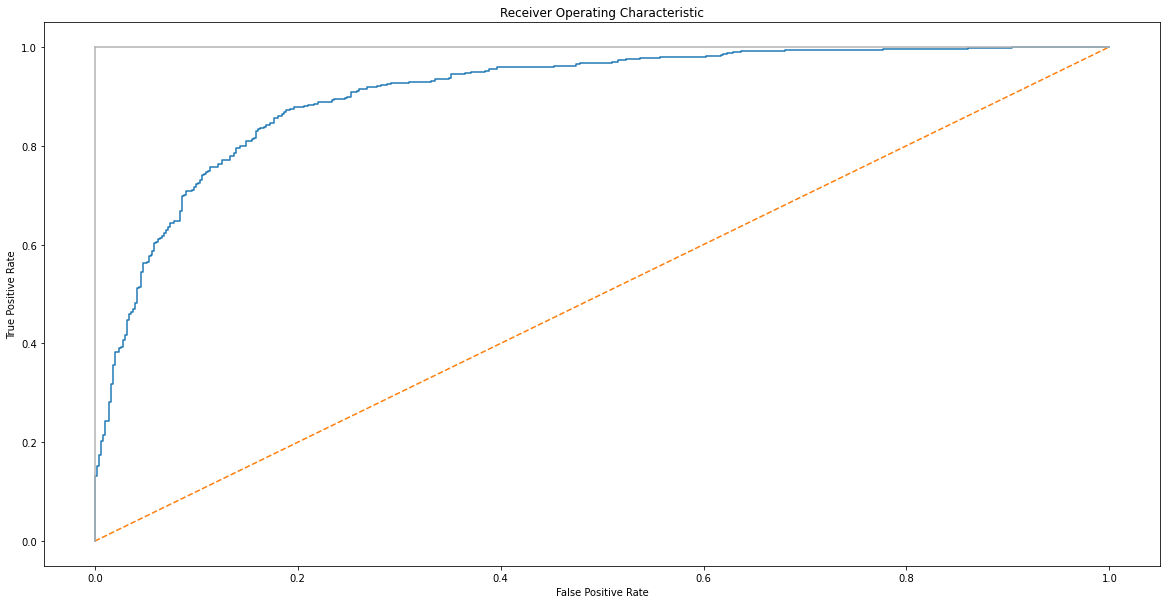

In [ ]:
# ROC 곡선 그리기
plt.figure(figsize=(20,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate, true_positive_rate)
plt.plot([0,1], ls='--')
plt.plot([0,0],[1,0],c='.7'), plt.plot([1,1],c='.7')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

머신러닝 알고리즘은 확률을 기반으로 예측값을 만듬

모든 샘플은 각 클래스에 속할 명시적인 확률이 주어짐

predict_proba 메서드로 첫번째 샘플에 대한 예측확률 확인 가능

In [ ]:
# 예측 확률 가능
logit.predict_proba(features_test)[0:1]

array([[0.86891533, 0.13108467]])

In [ ]:
# 클래스 확인하기
logit.classes_

array([0, 1])

첫번째 샘플은 음성 클래스(0) 이 될 가능성 87%, 양설 클래스(1) 가능성 13%.

기본적으로 사이킷런은 확률이 0.5 (임계값) 보다 크면 양성 클래스로 예측

실제 필요에 의해 중간값보다 다른 임계값을 사용해 모델을 편향되게 만들어야 될때가 있음

예를들어, 거짓 양성(FP)이 회사에 매우 큰 비용을 치르게 한다면 확률 임계값이 높은 모델 선호

일부 양성 샘플을 예측하지 못할 수 있지만 양성으로 예측된 샘플은 이 예측이 맞을 것이라고 강하게 확신 가능

진짜 양성비율(TPR) 과 거짓 양성 비율(FPR) 사이의 트레이드오프 (상충관계)

** 진짜 양성 비율(TPR)  = 민감도(Sensitivity)

올바르게 예측된 양성 샘플 개수를 전체 진짜 양성 샘플의 수로 나눈 것진짜 양성 / 

(진짜 양성 + 거짓 음성)

TP / P

**거짓 양성 비율(FPR)

잘못 예측된 양성 클래스 개수를 모든 진짜 음성 클래스 샘플수로 나눈 것

거짓 양성 / (거짓 양성 + 진짜 음성)

FP / N

먼저, 10명의 암 의심 환자가 있는데 여기서 3명만이 실제 암에 걸렸다고 가정해 봅시다(P = 3). 그 외 7명은 암에 걸리지 않았습니다(N = 7). 병원에서 10명의 환자에 대한 진단을 해서 3명의 암환자가 있다고 결론을 내렸습니다. 하지만 여기서 실제 암환자는 2명뿐입니다(TP = 2). 그렇다면 실제 양성 비율 TPR = TP/P = 2/3을 계산할 수 있습니다. 불행하게도, 7명의 암에 걸리지 않은 환자들 중 한 명이 오진을 받았습니다(FP = 1). 그렇다면 거짓 양성 비율 FPR = FP/N = 1/7을 계산할 수 있습니다. 해당 병원의 진단 자체를 하나의 분류기로 생각한다면, 이 분류기의 분류 결과는 ROC 곡선상의 점 (1/7, 2/3)이 됩니다.

AUCROC (ROC 곡선 아래 면적)   (Area Under the Curve)

좋은 모델일수록 곡선이 위로 올라가므로 곡선 아래 면적이 커짐.

AUCROC 가 1 에 가까울수록 더 좋은 모델.

사이킷런에서 roc_auc_score 함수로 계산

In [ ]:
# AUCROC 계산
roc_auc_score(target_test, target_probabilities)

0.9073389355742297

## 11.6 다중클래스 분류기 예측 평가하기

세 개 이상의 클래스를 예측하는 모델의 성능을 평가하고싶을땐
 
 두 개 이상의 클래스를 다룰 수 있는 평가 지표로 교차검증을 수행하기

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification

In [ ]:
# 특성 행렬과 타깃 벡터 만들기
features, target = make_classification(n_samples=10000,
                                       n_features=3,
                                       n_informative=3,
                                       n_redundant=0,
                                       n_classes=3,
                                       random_state=1)

In [ ]:
logit = LogisticRegression()

In [ ]:
cross_val_score(logit,features,target,scoring='accuracy')

array([0.841 , 0.829 , 0.8265, 0.8155, 0.82  ])

클래스가 균형 잡혀 있을때(예를들어 타깃 벡터의 클래스에 속한 샘플 개수가 거의 동일할때)

다중클래스에서도 하나의 클래스만 있는것처럼 각 클래스에서 측정한 값을 수집하여 평균값으로써 전체 클래스에 대한 평가 점수 얻기가능

In [ ]:
# 마크로 평균 F1 점수를 사용하여 교차검증 수행하기
cross_val_score(logit, features, target, scoring='f1_macro')

array([0.84061272, 0.82895312, 0.82625661, 0.81515121, 0.81992692])

*** macro ---- 각 클래스를 동등한 가중치로 클래스별 측정 점수를 평균

*** weighted ---- 샘플 개수에 비례하여 각 클래스별 측정 점수를 평균

*** micro ---- 클래스별 TP, TN , FP , FN 을 모두 더하여 계산

# Chapter 12. 모델 선택

완전 탐색을 사용해 최선의 모델 선택하기

In [ ]:
import numpy as np
from sklearn import linear_model, datasets
from sklearn.model_selection import GridSearchCV #모델 선택도와주는 library

In [ ]:
#데이터 로드
iris = datasets.load_iris()
features = iris.data
target = iris.target

In [ ]:
target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [ ]:
#선형모델 중에 로지스틱 사용(정균분포와 비슷)
logistic = linear_model.LogisticRegression()

#하이퍼 파라미터조정(사용자가 정의하는 변수값)
penalty = ['l1', 'l2']#엘원, 엘투

In [ ]:
logistic.fit(features, target)
logistic.score(features, target)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.9733333333333334

In [ ]:
C = np.logspace(0, 4, 10)#(start, stop, num) 규제 하이퍼 파라미터 값의 후보 범위를 만든다.

In [ ]:
hyperparameters = dict(C=C, penalty=penalty)#하이퍼 파라미터 후보로 딕셔너리 만들기
gridsearch = GridSearchCV(logistic, hyperparameters, cv=5, verbose=0)
best_model = gridsearch.fit(features, target)
print('가장 좋은 페널티:', best_model.best_estimator_.get_params()['penalty'])
print('가장 좋은 C 값:', best_model.best_estimator_.get_params()['C'])

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partit

가장 좋은 페널티: l2
가장 좋은 C 값: 7.742636826811269


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [ ]:
best_model.score(features, target)

0.98

In [ ]:
best_model.predict(feautures)

12.2 랜덤 탐색을 사용해 최선의 모델 

1.   항목 추가

*   항목 추가

1.   항목 추가
2.   항목 추가


*   항목 추가


2.   항목 추가

선택하기

In [ ]:
from scipy.stats import uniform
from sklearn import linear_model, datasets
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
iris = datasets.load_iris()
features = iris.data
target = iris.target

In [ ]:
logistic = linear_model.LogisticRegression()
penalty = ['l1', 'l2']
C = uniform(loc=0, scale=4)#0에서 4사이로 주기 
hyperparameters = dict(C=C, penalty = penalty)

In [ ]:
randomizedsearch = RandomizedSearchCV(logistic, hyperparameters, random_state=1, n_iter=100, cv=5, verbose=0, n_jobs=-1)

In [ ]:
best_model = randomizedsearch.fit(features, target)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [ ]:
print('가장 좋은 페널티:', best_model.best_estimator_.get_params()['penalty'])
print('가장 좋은 C 값:', best_model.best_estimator_.get_params()['C'])

NameError: ignored

In [ ]:
best_model.predict(features)

12.3 여러 학습 알고리즘에서 최선의 모델 선택하기

> 들여쓴 블록



In [ ]:
import numpy as np
from sklearn import datasets 
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

In [ ]:
np.random.seed(0)

In [ ]:
iris = datasets.load_iris()
features = iris.data
target = iris.target

In [ ]:
pipe = Pipeline([("classifier", RandomForestClassifier())])

In [ ]:
search_space = [{"classifier": [LogisticRegression()],
                  "classifier__penalty": ['l1', 'l2'],
                 "classifier__C": np.logspace(0, 4, 10)},
                {"classifier": [RandomForestClassifier()],
                "classifier__n_estimators" : [10, 100, 1000],
                 "classifier__max_features": [1, 2, 3]}]

In [ ]:
gridsearch = GridSearchCV(pipe, search_space, cv=5, verbose=0)

In [ ]:
best_model = gridsearch.fit(features, target)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partit

In [ ]:
best_model.best_estimator_.get_params()["classifier"]

LogisticRegression(C=7.742636826811269, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
best_model.predict(features)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

12.4 전처리와 함께 최선의 모델 선택하기 

In [ ]:
import numpy as np 
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.decomposition import PCA 
from sklearn.preprocessing import StandardScaler

In [ ]:
np.random.seed(0)

In [ ]:
iris=datasets.l

*12.5* 병렬화로 모델 선택 속도 높이기

In [ ]:
import numpy as np
from sklearn import linear_model, datasetsfrom sklearn.model_selection import GridSearchCV
iris = datasets.load_ris()
features = iris.data
target = iris.target
logistic = linear_model.LogisticRegression()
penalty = ["l1", "l2"]
C = np.logspace(0, 4, 1000)
hyperparameters = dict(C=C, penalty = penalty)